<h1> MACHINE LEARNING FOR ELECTRICAL ENGINEERING - GROUP 21 </h2>
<h2> Project Assignment – Electrical Power Engineering Track </h3> 

__Members:__ <br>
__1. Ananth Rajagopal (Student Number: 5912431) - ananthrajagopal@student.tudelft.nl__<br>
__2. Tirth Meghani (Student Number: 6024386) - t.meghani@student.tudelft.nl__

### Motivation and Problem Statement - Scenario Risk Estimation for Power Systems

Power system operational risk can be investigated in different time frames: from near real-time operation (a couple of seconds) to long-term planning (+5 years). In modern power systems, evaluating operational risk is getting more complex due to the introduction of renewable-based generation systems (e.g., wind, PV). These systems add more uncertainty while reducing the power system’s inertia. As a result, a large number of possible operational scenarios may occur.<br> <br>
The power system operator must be able to anticipate which of these operational scenarios may result in a risky operation. To do so, they rely on dynamic simulations with predefined contingency sets to estimate the system’s strength. This kind of study is done based on power flow analysis, providing estimations of voltage magnitude, active and reactive power flows, and angles. Based on these estimations, any scenario can be translated into a risk measure (<b>Safe / Low / Medium / High Risk</b>) based on the current power system conditions. The aim is to develop an ML model that estimates a power system risk index and defines its operational state.

### Data Science Problem Statements

1. Data Preprocessing on the given data of IEEE-9 test systems for transforming and integrating the data and make it ready for further analysis.
2. Estimate the risk factor (𝑅) for new unseen operational scenarios of the Power System based on the above preprocessed data.
3. Estimate the risk state (class) for new unseen operational scenarios on the Power Systems due various operational scenarios.

### Evaluation Metrics

The following performance metrics have been used in the project for model evaluations:

- Classification
    1. [F1_Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
    2. [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
    3. [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
    4. [Confusion Matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#confusion-matrix)
    5. [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
- Regression
    1. [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
    2. [R2 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

__We have later used the recall score to identify the best peforming model__

### Objective of this notebook

The main objective of this notebook is to work through the entire ML workflow for solving the problem stated above.

We have written modular code in form of functions, the major advantages of this are
- Reusablity - The functions we will be writing are reusable and same task can be performed again by just importing the function without explicitly having to write the same piece of code again. 
- This will save us a good amount of time.

# Understanding the dataset

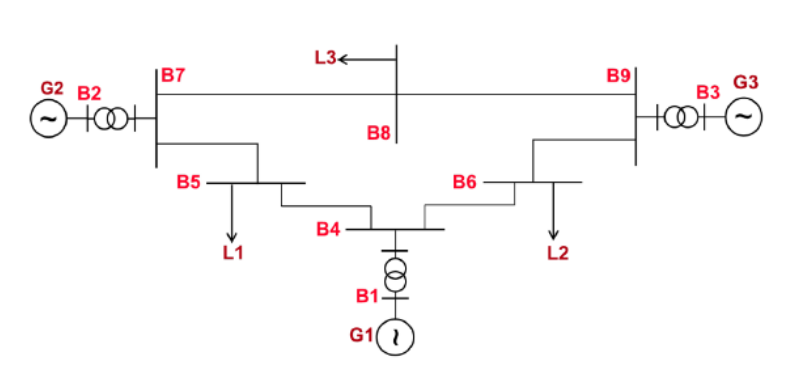
<br>The data is from the IEEE 9 bus test system. A large number of operating scenarios were generated by varying load consumption and generation on different levels. For each of these scenarios, a power flow simulation was executed obtaining the following feature matrix

${F} = [𝑃_{𝑖}, 𝑄_{𝑖}, 𝑉_{𝑖}, 𝜃_{𝑖}, 𝑃_{𝑖𝑗}, 𝑄_{𝑖𝑗}] $ $ for $ $  𝑖 = $ $ ${$1, .. ,9$ }

This matrix is the initial dataset which will be used to train the ML model. If ij does not exist then, $ P_{ij} = Q_{ij} = 0 $. The risk factor (R) is measured to quantify risk against severe disturbances. This R is a normalized, continuous value between 0.0 and 1.0.  Table below presents the defined power system risk class based on the value of 𝑅.
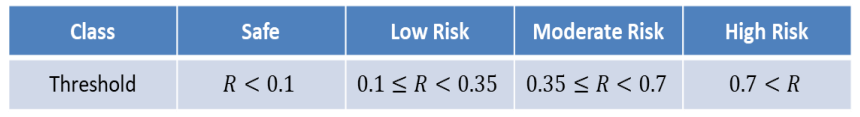

There is one datasets:
__`Project_Data_EE4C12_EPE_PS.csv`__ with feature matrix containing values of voltages, active & reactive power values and power factor angle with the target variable as mentioned below with data points (4955) and 218 inputs including the target feature R.

|Feature|Feature Type|Description|Columns|
|-----|-----|-----|-----|
|Unnamed|Discrete|Indices of Data Points|1|
|Bus Voltages-1 to Bus Angles-9|Numeric|Phase Angles at B1-B9 $ (V_{𝑖}) $|9|
|Bus Angles-1 to Bus Angles-9|Numeric|Phase Angles at B1-B9 $ (𝜃_{𝑖}) $|9|
|P generation-1 to  P generation-9|Numeric|Active Power Generated at B1-B9 $ (P_{𝑖}) $|9|
|Q generation-1 to  Q generation-9|Numeric|Reactive Power Generated at B1-B9 $ (Q_{𝑖}) $|9|
|P demand-1 to  P demand-9|Numeric|Active Power Demand at B1-B9 $ (P_{𝑖}) $|9|
|Q demand-1 to  Q demand-9|Numeric|Reactive Power Demand at B1-B9 $ (Q_{𝑖}) $|9|
|Pflow Bus 1-1 to  Pflow Bus 1-9|Numeric|Active Power Flow between B1 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 2-1 to  Pflow Bus 2-9|Numeric|Active Power Flow between B2 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 3-1 to  Pflow Bus 3-9|Numeric|Active Power Flow between B3 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 4-1 to  Pflow Bus 4-9|Numeric|Active Power Flow between B4 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 5-1 to  Pflow Bus 5-9|Numeric|Active Power Flow between B5 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 6-1 to  Pflow Bus 6-9|Numeric|Active Power Flow between B6 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 7-1 to  Pflow Bus 7-9|Numeric|Active Power Flow between B7 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 8-1 to  Pflow Bus 8-9|Numeric|Active Power Flow between B8 and other nodes $ (P_{𝑖j}) $|9|
|Pflow Bus 9-1 to  Pflow Bus 9-9|Numeric|Active Power Flow between B9 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 1-1 to  Pflow Bus 1-9|Numeric|Reactive Power Flow between B1 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 2-1 to  Pflow Bus 2-9|Numeric|Reactive Power Flow between B2 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 3-1 to  Pflow Bus 3-9|Numeric|Reactive Power Flow between B3 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 4-1 to  Pflow Bus 4-9|Numeric|Reactive Power Flow between B4 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 5-1 to  Pflow Bus 5-9|Numeric|Reactive Power Flow between B5 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 6-1 to  Pflow Bus 6-9|Numeric|Reactive Power Flow between B6 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 7-1 to  Pflow Bus 7-9|Numeric|Reactive Power Flow between B7 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 8-1 to  Pflow Bus 8-9|Numeric|Reactive Power Flow between B8 and other nodes $ (P_{𝑖j}) $|9|
|Qflow Bus 9-1 to  Pflow Bus 9-9|Numeric|Reactive Power Flow between B9 and other nodes $ (P_{𝑖j}) $|9|
 

**Target variable (desired output):**  

|Feature|Feature_Type|Description|
|-----|-----|-----|
|Risk Factor | Numeric & continuous| Normalized Risk Factor that quantifies risk against severe disturbance $ (R) $|

### Loading Data Modelling Libraries

We will use the scikit-learn library to develop our machine learning algorithms. In sklearn, algorithms are implemented in their own classes so they can be directly called and used post the importing is performed. For data visualization, we will be using the matplotlib and seaborn library. Below are common classes to load. Apart from that, we will be basing the operations on numpy and pandas libraries. The former for calculations and the latter for tabular operations.

In [1]:
# Import packages needed for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import f1_score, make_scorer, roc_curve, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, KFold
from skimage.feature import hog
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Dataset Preperation

- In this task, we'll load the dataframe in pandas, and drop unnecessary columns

In [2]:
dataframe = pd.read_csv("Project_Data_EE4C12_EPE_PS.csv")

# Remove the first Unnamed: 0 column from the dataset which specifies the Id
dataframe.drop('Unnamed: 0', axis=1, inplace=True)
display(dataframe.head())

Bus Voltage-1  Bus Voltage-2  Bus Voltage-3  Bus Voltage-4  Bus Voltage-5  \
0           1.04          1.025          1.025       1.051752       1.052997   
1           1.04          1.025          1.025       1.045137       1.021813   
2           1.04          1.025          1.025       1.048968       1.048291   
3           1.04          1.025          1.025       1.044267       1.038909   
4           1.04          1.025          1.025       1.045679       1.043050   

   Bus Voltage-6  Bus Voltage-7  Bus Voltage-8  Bus Voltage-9  Bus Angles-1  \
0       1.045422       1.045174       1.044088       1.044771           0.0   
1       1.036321       1.036890       1.035527       1.038926           0.0   
2       1.038432       1.042474       1.039527       1.042019           0.0   
3       0.963355       1.030858       1.022136       1.023767           0.0   
4       1.030835       1.039573       1.034735       1.039076           0.0   

   ...  Qflow Bus 9-1  Qflow Bus 9-2  Qflow Bus 9-3  Qflow Bus 9-4  \
0  ...            0.0            0.0     -34.356254            0.0   
1  ...            0.0            0.0     -24.130608            0.0   
2  ...            0.0            0.0     -29.542666            0.0   
3  ...            0.0            0.0       2.386848            0.0   
4  ...            0.0            0.0     -24.394474            0.0   

   Qflow Bus 9-5  Qflow Bus 9-6  Qflow Bus 9-7  Qflow Bus 9-8  Qflow Bus 9-9  \
0            0.0     -15.395107            0.0     -10.467886            0.0   
1            0.0     -25.342725            0.0      -7.625909            0.0   
2            0.0     -18.642362            0.0     -11.757630            0.0   
3            0.0     -29.549593            0.0     -17.076432            0.0   
4            0.0     -22.055516            0.0     -13.056821            0.0   

   Risk Factor  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 217 columns]

## Seperating the features and the target variable

We need to seperate both the features and the target variable (Risk) so that all the transformations we apply affect the features only and do not impact the target variable

- In the function below, we seperate the features and targetity.

In [3]:
def seperate_feature_and_target(dataset):
    features = dataset.drop(columns=['Risk Factor'])  # Features
    target = np.asarray(dataset['Risk Factor'])  # Target
    return features, target
    
features, target = seperate_feature_and_target(dataframe)

## Adding the class column based on the threshold.

The classes can be mapped to the data. Also, for classification task, it is required to estimate this class based on the Risk (R) value.
- In the function below, we add the class column in the dataset based on the risk values and the threshold as follows
| Threshold | Class |
| :--- | :--- |
| R < 0.1 | Safe |
| 0.1 ≤ R < 0.35 | Low Risk |
| 0.35 ≤ R < 0.7 | Moderate Risk |
| 0.75 < R | High Risk |

In [4]:
def risk_class(risk_value):
    if risk_value < 0.1:
        return 'Safe'
    elif 0.1 <= risk_value < 0.35:
        return 'Low Risk'
    elif 0.35 <= risk_value < 0.7:
        return 'Moderate Risk'
    else:
        return 'High Risk'

labels = np.array(list(map(risk_class, target)))

## Train-Test Splitting of the features, target (risk value) and encoded labels (risk class)

- The function creates train and test data for task two (regression and classification) prediction.

In [5]:
def train_test_splitting(feature, target, labels):
    feature_train, feature_test, target_train, target_test, label_train, label_test = train_test_split(feature, target, labels, train_size = 0.8, random_state = 42)
    return feature_train, feature_test, target_train, target_test, label_train, label_test

feature_train, feature_test, target_train, target_test, label_train, label_test = train_test_splitting(features, target, labels)

__=============================================================================================================__

# Task 1 - Performing Data Pre-processing Activities

## Data Cleaning

### Check Numeric and Categorical Features

A dataset consists of numerical and categorical columns.

Looking at the dataset, we think we can identify the categorical and continuous columns in it. But it might also be possible that the numerical values are represented as strings in some feature. Or the categorical values in some features might be represented as some other datatypes instead of strings. Hence it's good to check for the datatypes of all the features.

In [6]:
# Function to identify numeric features
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()
    
numeric_columns = numeric_features(feature_train)

print("Numeric Features in feature Vector")
display(numeric_columns)

print("===="*37)

# Function to identify categorical features
def categorical_features(dataset):
    categorical_col = dataset.select_dtypes(exclude=np.number).columns.tolist()
    return dataset[categorical_col].head()
    
categorical_columns = categorical_features(feature_train)
print("Categorical Features in feature Vector")
print(categorical_columns)

Numeric Features in feature Vector


Bus Voltage-1  Bus Voltage-2  Bus Voltage-3  Bus Voltage-4  \
2881           1.04          1.025          1.025       1.038709   
3026           1.04          1.025          1.025       1.037861   
1204           1.04          1.025          1.025       1.050395   
80             1.04          1.025          1.025       1.041279   
803            1.04          1.025          1.025       1.034845   

      Bus Voltage-5  Bus Voltage-6  Bus Voltage-7  Bus Voltage-8  \
2881       1.038909       1.012076       1.040348       1.036120   
3026       1.023850       1.025228       1.032313       1.020198   
1204       1.046864       1.047614       1.042352       1.038817   
80         1.036371       1.024343       1.039073       1.032403   
803        1.026662       1.008474       1.032069       1.022324   

      Bus Voltage-9  Bus Angles-1  ...  Qflow Bus 8-9  Qflow Bus 9-1  \
2881       1.038398           0.0  ...     -11.864859            0.0   
3026       1.035539           0.0  ...       0.000000            0.0   
1204       1.043876           0.0  ...      -8.865878            0.0   
80         1.037814           0.0  ...      -5.222445            0.0   
803        1.032832           0.0  ...      -5.153859            0.0   

      Qflow Bus 9-2  Qflow Bus 9-3  Qflow Bus 9-4  Qflow Bus 9-5  \
2881            0.0     -21.393698            0.0            0.0   
3026            0.0     -18.205429            0.0            0.0   
1204            0.0     -32.545308            0.0            0.0   
80              0.0     -22.185784            0.0            0.0   
803             0.0     -11.938235            0.0            0.0   

      Qflow Bus 9-6  Qflow Bus 9-7  Qflow Bus 9-8  Qflow Bus 9-9  
2881     -18.363663            0.0      -9.883468            0.0  
3026     -17.847648            0.0       0.000000            0.0  
1204     -13.471059            0.0     -13.189093            0.0  
80       -18.683769            0.0     -17.122952            0.0  
803      -25.400827            0.0     -14.478009            0.0  

[5 rows x 216 columns]

Categorical Features in feature Vector
Empty DataFrame
Columns: []
Index: [2881, 3026, 1204, 80, 803]


###### We can note than all features are numeric features and no categorical columns. Thus we do not need to encode our dataframe.

### Check Missing Data 

One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to the machine learning model could lead to mislwading prediction. Hence it is necessary to identify missing values and treat them.

- In the function below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
- The function ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [7]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    return missing_data
    
missing_data = missing_data(feature_train)
display(missing_data.sort_values("Percent"))

Total  Percent
Bus Voltage-1        0      0.0
 P generation-8      0      0.0
Bus Voltage-3        0      0.0
Bus Voltage-4        0      0.0
Bus Voltage-5        0      0.0
...                ...      ...
Qflow Bus 9-5        0      0.0
Qflow Bus 9-6        0      0.0
Qflow Bus 9-7        0      0.0
Qflow Bus 8-5        0      0.0
Qflow Bus 9-9        0      0.0

[216 rows x 2 columns]

###### We can conclude that there are no missing values in any feature column in the dataset.

### Checking columns with all data points are same/zeros and removing all these columns as they do not add any value in contributing to predict the target variable value.

This is an important step as the columns where all data points are same/zeros do not contribute for us to predict the risk. It is an insignificant column and should be removed so that the total features can be reduced and model can be made more accurate 

- In the function below, we find the feature where all data points are same in the dataset.
- The function ideally returns a list of features that needs to be discarded because they have the same data and then removes these features from the original dataframe.

In [8]:
# Function to identify simalar data point features
def same_data_columns(dataset):
    mask = (dataset == dataset.iloc[0]).all()
    same_data_columns = dataset.columns[mask]

    # Drop the columns with the same data
    dataset1 = dataset.drop(columns=same_data_columns)
    return same_data_columns.tolist(), dataset1
        
same_data_columns, feature_train = same_data_columns(feature_train)
display(feature_train.head())

Bus Voltage-2  Bus Voltage-3  Bus Voltage-4  Bus Voltage-5  \
2881          1.025          1.025       1.038709       1.038909   
3026          1.025          1.025       1.037861       1.023850   
1204          1.025          1.025       1.050395       1.046864   
80            1.025          1.025       1.041279       1.036371   
803           1.025          1.025       1.034845       1.026662   

      Bus Voltage-6  Bus Voltage-7  Bus Voltage-8  Bus Voltage-9  \
2881       1.012076       1.040348       1.036120       1.038398   
3026       1.025228       1.032313       1.020198       1.035539   
1204       1.047614       1.042352       1.038817       1.043876   
80         1.024343       1.039073       1.032403       1.037814   
803        1.008474       1.032069       1.022324       1.032832   

      Bus Angles-2  Bus Angles-3  ...  Qflow Bus 6-4  Qflow Bus 6-9  \
2881      2.303627      3.240237  ...      12.514597     -13.919610   
3026      5.307983     -1.172983  ...      -2.190911     -18.851319   
1204     -0.222630     -0.809900  ...     -10.989995     -25.230634   
80        5.276051     -0.917848  ...       1.686914     -17.698902   
803      -5.977884     -3.753930  ...       8.665005     -10.409853   

      Qflow Bus 7-2  Qflow Bus 7-5  Qflow Bus 7-8  Qflow Bus 8-7  \
2881     -23.949416      -9.637135     -10.293917      -5.174009   
3026      -8.356838      -7.102448     -17.990413       4.197586   
1204     -27.564071      -9.804127      -8.420607      -6.834798   
80       -18.837636      -7.300307      -7.091049      -5.291268   
803      -10.968705     -18.100039     -16.584047       1.942512   

      Qflow Bus 8-9  Qflow Bus 9-3  Qflow Bus 9-6  Qflow Bus 9-8  
2881     -11.864859     -21.393698     -18.363663      -9.883468  
3026       0.000000     -18.205429     -17.847648       0.000000  
1204      -8.865878     -32.545308     -13.471059     -13.189093  
80        -5.222445     -22.185784     -18.683769     -17.122952  
803       -5.153859     -11.938235     -25.400827     -14.478009  

[5 rows x 63 columns]

###### We are left with 64 columns that contriute in our prediction of the Risk value (R) - Target column

## Feature Selection 

Now that we have looked at our data, we now have a basic understanding of what our data look like. Let's now use feature selection methods for identifying the best set of features for each model.
- The Function below plots the Feature importance of the features using the `Decision Tree` Model.

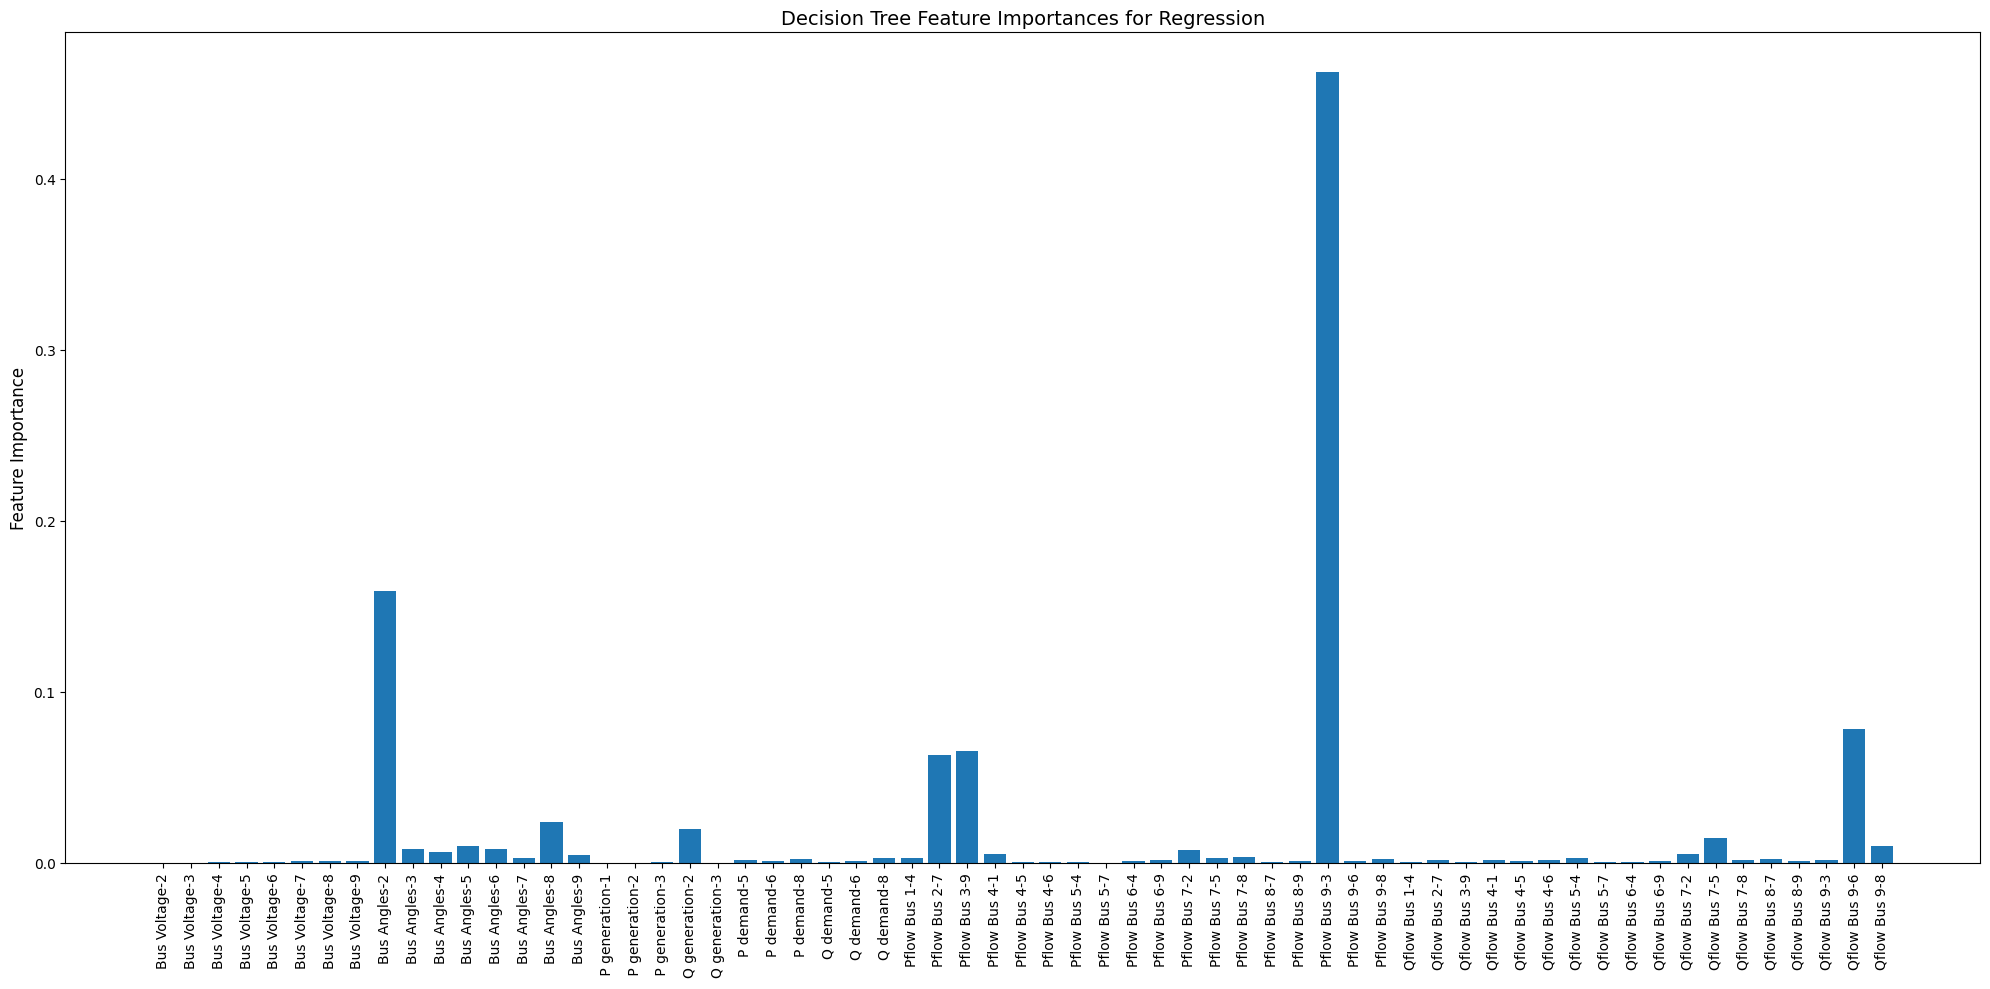

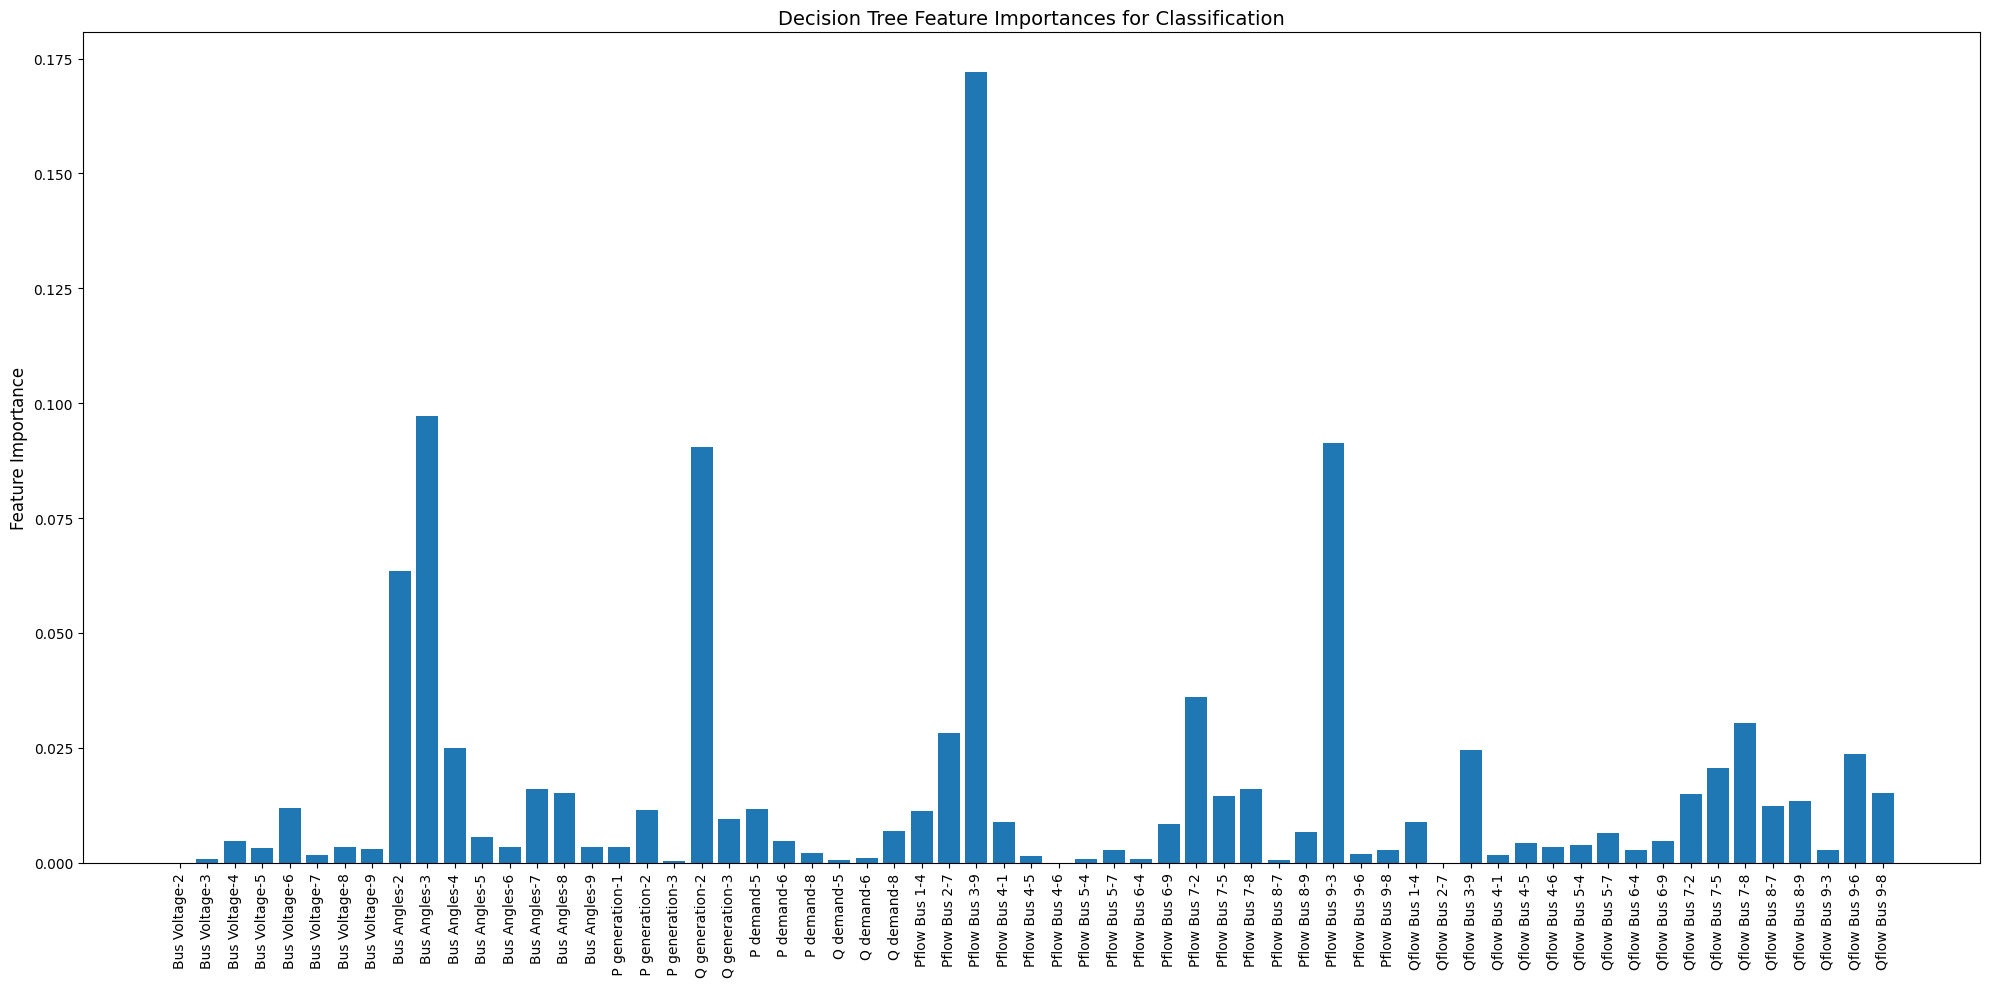

In [9]:
def feature_importance(feature, target, top_features):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

    try:
        regressor = DecisionTreeRegressor(random_state=42)
        regressor.fit(X_train, y_train)
        feature_importances = regressor.feature_importances_
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_title('Decision Tree Feature Importances for Regression', fontsize=14)
    except ValueError:
        classifier = DecisionTreeClassifier(random_state=42)
        classifier.fit(X_train, y_train)
        feature_importances = classifier.feature_importances_
        fig, ax = plt.subplots(figsize=(20, 10))
        ax.set_title('Decision Tree Feature Importances for Classification', fontsize=14)

    top_indices = np.argsort(feature_importances)[::-1][:top_features]
    top_feature_importances = list(feature.columns[top_indices])
    ax.bar(range(len(feature_importances)), feature_importances)
    ax.set_xticks(range(len(feature_importances)))
    ax.set_xticklabels(feature_train.columns, rotation=90, fontsize=10)
    ax.set_ylabel('Feature Importance', fontsize=12)
    plt.tight_layout()
    plt.show()
    return top_feature_importances

top_features_regression = feature_importance(feature_train, target_train, top_features = 10)
top_features_classification = feature_importance(feature_train, label_train, top_features = 15)

In [10]:
print('Top Features for Regression: ', top_features_regression)
print('Top Features for Classification: ', top_features_classification)

Top Features for Regression:  ['Pflow Bus 9-3', 'Bus Angles-2', 'Qflow Bus 9-6', 'Pflow Bus 3-9', 'Pflow Bus 2-7', 'Bus Angles-8', 'Q generation-2', 'Qflow Bus 7-5', 'Qflow Bus 9-8', 'Bus Angles-5']
Top Features for Classification:  ['Pflow Bus 3-9', 'Bus Angles-3', 'Pflow Bus 9-3', 'Q generation-2', 'Bus Angles-2', 'Pflow Bus 7-2', 'Qflow Bus 7-8', 'Pflow Bus 2-7', 'Bus Angles-4', 'Qflow Bus 3-9', 'Qflow Bus 9-6', 'Qflow Bus 7-5', 'Bus Angles-7', 'Pflow Bus 7-8', 'Qflow Bus 9-8']


- After looking at the graph, we can see that the influence of Power flow between bus 3-9, 7-8 and 9-8 impacts the risk estimation to a great extent. Apart from this, Bus Angles of 2,5,8,4 also plays a central role. Also, we see that bus voltages are not that significant in determining the risk values and the risk class.
- We have also displayed the top 20 regression and classification features.

#### Using the important features above and subset the feature vector before training the classsification and regression models

In [11]:
feature_train_regression = feature_train[top_features_regression].reset_index(drop=True)
feature_train_classification = feature_train[top_features_classification].reset_index(drop=True)

## Selecting top features influencing the prediction

Now, we check accuracy of model (We have used a decision tree here) with top 1 feature, top 2 features, top 3 features and so on up top 20 features and display the respective accuracy scores. This will help us make out how many optimal features give us the best prediction and performance of the model we will be training.
- The function below does the same and displays the accuracy scores and the parameters used

Top 1 Accuracy: 0.8487
Top Features: ['Pflow Bus 3-9', 'Bus Angles-3', 'Q generation-2', 'Bus Angles-2', 'Bus Angles-4', 'Qflow Bus 3-9', 'Qflow Bus 7-8', 'Pflow Bus 9-3', 'Pflow Bus 7-8', 'Pflow Bus 7-2', 'Qflow Bus 9-6', 'Qflow Bus 7-5', 'Pflow Bus 2-7', 'Qflow Bus 9-8']
Top 2 Accuracy: 0.8449
Top Features: ['Pflow Bus 3-9', 'Bus Angles-3', 'Q generation-2', 'Bus Angles-2', 'Bus Angles-4', 'Qflow Bus 3-9']
Top 3 Accuracy: 0.8411
Top Features: ['Pflow Bus 3-9', 'Bus Angles-3', 'Q generation-2', 'Bus Angles-2', 'Bus Angles-4', 'Qflow Bus 3-9', 'Qflow Bus 7-8', 'Pflow Bus 9-3', 'Pflow Bus 7-8', 'Pflow Bus 7-2']
Top 4 Accuracy: 0.8411
Top Features: ['Pflow Bus 3-9', 'Bus Angles-3', 'Q generation-2', 'Bus Angles-2', 'Bus Angles-4', 'Qflow Bus 3-9', 'Qflow Bus 7-8', 'Pflow Bus 9-3', 'Pflow Bus 7-8', 'Pflow Bus 7-2', 'Qflow Bus 9-6']
Top 5 Accuracy: 0.8398
Top Features: ['Pflow Bus 3-9', 'Bus Angles-3', 'Q generation-2', 'Bus Angles-2', 'Bus Angles-4']


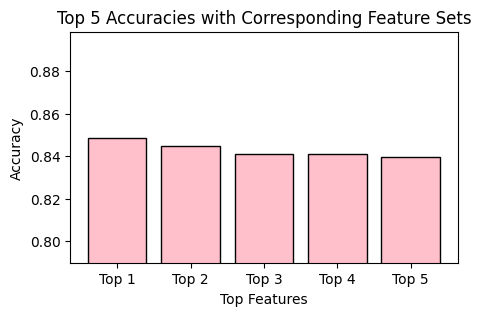

Top 1 Accuracy: 1.1350
Top Features: ['Pflow Bus 9-3', 'Bus Angles-2', 'Qflow Bus 9-6', 'Pflow Bus 3-9', 'Pflow Bus 2-7', 'Bus Angles-4', 'Q generation-2', 'Qflow Bus 7-5', 'Bus Angles-3', 'Qflow Bus 3-9', 'Qflow Bus 9-8', 'Pflow Bus 7-8', 'Bus Angles-7', 'Qflow Bus 7-8']
Top 2 Accuracy: 1.1264
Top Features: ['Pflow Bus 9-3', 'Bus Angles-2', 'Qflow Bus 9-6', 'Pflow Bus 3-9', 'Pflow Bus 2-7', 'Bus Angles-4', 'Q generation-2', 'Qflow Bus 7-5', 'Bus Angles-3', 'Qflow Bus 3-9', 'Qflow Bus 9-8']
Top 3 Accuracy: 1.1257
Top Features: ['Pflow Bus 9-3', 'Bus Angles-2', 'Qflow Bus 9-6', 'Pflow Bus 3-9', 'Pflow Bus 2-7', 'Bus Angles-4', 'Q generation-2', 'Qflow Bus 7-5', 'Bus Angles-3', 'Qflow Bus 3-9', 'Qflow Bus 9-8', 'Pflow Bus 7-8', 'Bus Angles-7', 'Qflow Bus 7-8', 'Pflow Bus 7-2']
Top 4 Accuracy: 1.1257
Top Features: ['Pflow Bus 9-3', 'Bus Angles-2', 'Qflow Bus 9-6', 'Pflow Bus 3-9', 'Pflow Bus 2-7', 'Bus Angles-4', 'Q generation-2', 'Qflow Bus 7-5', 'Bus Angles-3', 'Qflow Bus 3-9', 'Qflow B

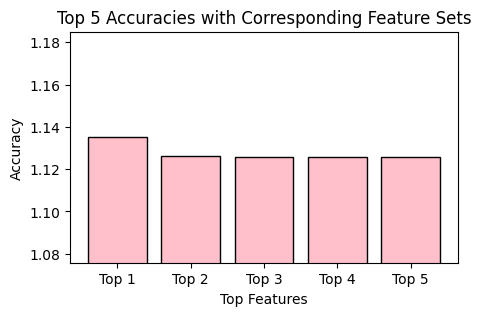

In [12]:
def feature_importance_score(feature, target):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)
    accuracies = []
    feature_sets = []
    
    # Iterating through the top 1 to top 20 features
    try:
        for num_features in range(1, 21):
            # Create a Decision Tree classifier
            classifier = DecisionTreeClassifier(random_state = 42)
            selected_features = np.argsort(np.abs(classifier.fit(X_train, y_train).feature_importances_))[::-1][:num_features]
            
            X_train_subset = X_train.iloc[:, selected_features]
            X_test_subset = X_test.iloc[:, selected_features]
            classifier.fit(X_train_subset, y_train)
            y_pred = classifier.predict(X_test_subset)
            
            accuracy = accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)
            feature_sets.append(selected_features)

        sorted_indices = np.argsort(accuracies)[::-1]
        top_5_accuracies = [accuracies[i] for i in sorted_indices[:5]]
        top_5_feature_sets = [feature_sets[i] for i in sorted_indices[:5]]
        for i, (accuracy, feature_set) in enumerate(zip(top_5_accuracies, top_5_feature_sets), start=1):
            print(f"Top {i} Accuracy: {accuracy:.4f}") 
            print("Top Features:", list(feature.iloc[:, feature_set].columns))
            
        plt.figure(figsize=(5, 3))
        plt.bar(range(1, 6), top_5_accuracies, tick_label=[f"Top {i}" for i in range(1, 6)], color='pink', edgecolor='black')
        plt.xlabel('Top Features')
        plt.ylabel('Accuracy')
        plt.title('Top 5 Accuracies with Corresponding Feature Sets')
        plt.ylim(min(top_5_accuracies) - 0.05, max(top_5_accuracies) + 0.05)
        plt.show()
        
    except ValueError:
        for num_features in range(1, 21):
            # Create a Decision Tree regressor
            regressor = DecisionTreeRegressor(random_state = 42)
            selected_features = np.argsort(np.abs(regressor.fit(X_train, y_train).feature_importances_))[::-1][:num_features]
            
            X_train_subset = X_train.iloc[:, selected_features]
            X_test_subset = X_test.iloc[:, selected_features]
            regressor.fit(X_train_subset, y_train)
            y_pred = regressor.predict(X_test_subset)

            mse = mean_squared_error(y_test, y_pred)
            accuracy = 1 / (mse*100) 
            accuracies.append(accuracy)
            feature_sets.append(selected_features)
        
        sorted_indices = np.argsort(accuracies)[::-1]
        top_5_accuracies = [accuracies[i] for i in sorted_indices[:5]]
        top_5_feature_sets = [feature_sets[i] for i in sorted_indices[:5]]
        
        for i, (accuracy, feature_set) in enumerate(zip(top_5_accuracies, top_5_feature_sets), start=1):
            print(f"Top {i} Accuracy: {accuracy:.4f}") 
            print("Top Features:", list(feature.iloc[:, feature_set].columns))
            
        plt.figure(figsize=(5, 3))
        plt.bar(range(1, 6), top_5_accuracies, tick_label=[f"Top {i}" for i in range(1, 6)], color='pink', edgecolor='black')
        plt.xlabel('Top Features')
        plt.ylabel('Accuracy')
        plt.title('Top 5 Accuracies with Corresponding Feature Sets')
        plt.ylim(min(top_5_accuracies) - 0.05, max(top_5_accuracies) + 0.05)
        plt.show()
        
    return list(feature.iloc[:, top_5_feature_sets[0]].columns)

top_features_classification = feature_importance_score(feature_train_classification, label_train)
top_features_regression = feature_importance_score(feature_train_classification, target_train)

__We now select the features with top accuracy scores, top 9 features for clsssification and 20 for regression__

In [13]:
feature_train_regression = feature_train[top_features_regression].reset_index(drop=True)
feature_train_classification = feature_train[top_features_classification].reset_index(drop=True)

## Checking correlations between feature columns
- __Displaying scatterplots of columns with abs(correlation) >= 0.9__

This has a lot of significance as highly correlated features because for highly correlated features, it becomes difficult for the model to estimate the relationship between each independent variable and the target because the variables tend to change together.

- In the function below, we find the feature where multicollearity is present.
- We then display the plot of scatterplots with tespect to the target and heatmaps for the features

Correlated Features for Regression: 


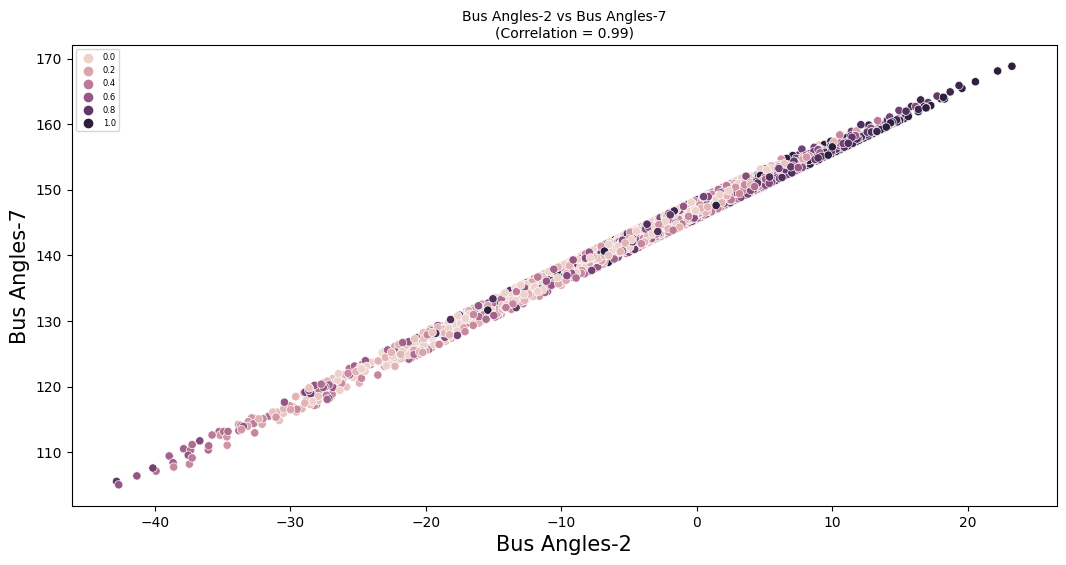

Correlated Features for Classification: 


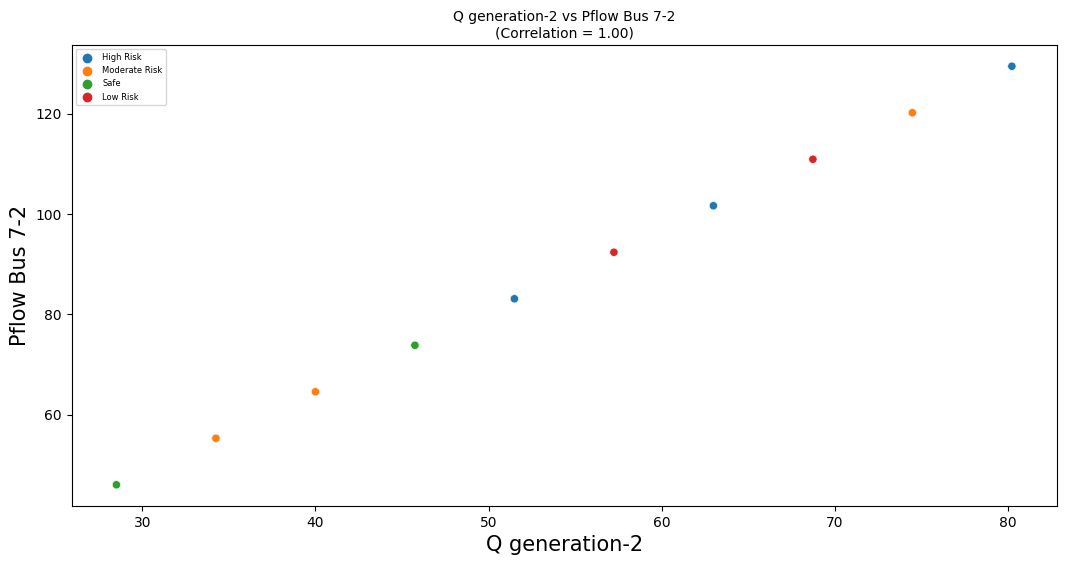

In [14]:
def check_highly_correlated(dataframe, target):
    high_correlated_features = []
    correlation_matrix = dataframe.corr()
    high_correlation_features = (correlation_matrix >= 0.9)
    high_correlation_pairs = [(column1, column2) 
                               for column1 in dataframe.columns 
                               for column2 in dataframe.columns 
                               if high_correlation_features[column1][column2] and column1 != column2]
    
    num_features = len(dataframe.columns)
    plt.figure(figsize = (num_features * 3, num_features * 1.5))
    plotted_columns = set()
    for i, (column1, column2) in enumerate(high_correlation_pairs, 1):
        if column2 not in plotted_columns:
            plt.subplot((len(high_correlation_pairs)) + 4 // 2, 4, i+1)
            sns.scatterplot(data = dataframe, hue = target, x = column1, y = column2)
            # Correlation coefficient for printing
            corr_coeff = dataframe[column1].corr(dataframe[column2])
            plt.title(f'{column1} vs {column2}\n(Correlation = {corr_coeff:.2f})', fontsize=10)
            plt.xlabel(column1, fontsize=15)
            plt.ylabel(column2, fontsize=15)
            plotted_columns.add(column1)
            plotted_columns.add(column2)
            plt.legend(fontsize=6)
            high_correlated_features.append(column1)
        plt.tight_layout()
    plt.show()
    return high_correlated_features
    

print("Correlated Features for Regression: ")
high_correlated_regression = check_highly_correlated(feature_train_regression, target_train)
print("Correlated Features for Classification: ")
high_correlated_classification = check_highly_correlated(feature_train_classification, label_train)

__We can see the presence of Multicollinearity between some features but the one with very few data points can be ignored__ 

Multicollinearity occurs when features are highly correlated with other features in the dataset. This affects model performance. We can employ PCA (Principal Component Analysis) here as it solves multicollinearity by combineing the highly correlated variables into a set of uncorrelated variables. Therefore, PCA can effectively eliminate multicollinearity between features.

## Using Principal Component Analysis (PCA) to tackle Multicollinearity

Principal Component Analysis (PCA) is a dimensionality reduction technique that can help combat the issue of correlated features by transforming the original features into a new set of uncorrelated variables called principal components. PCA can be used to reduce the dimensionality of the dataset while retaining most of the important information.

1. In the function below, we use PCA to address correlated features issue.
2. First, We need to standardize the data. The PCA is sensitive to variable scale, so we standardize them before applying PCA.
3. To decide on the number of principal components in PCA, we use either a Scree plot or cumulative explained variance plot.
    - In the Scree Plot (Explained Variance Plot), we find an "elbow" point where the variance ratio starts to level off to get number of principal components that manages to capture the most variance in the data.
    - In the Cumulative Explained Variance Plot, we find a point where adding more components doesn't increase the explained variance significantly. This point shows the number of principal components which captures a sufficient variance.

PCA for Classification


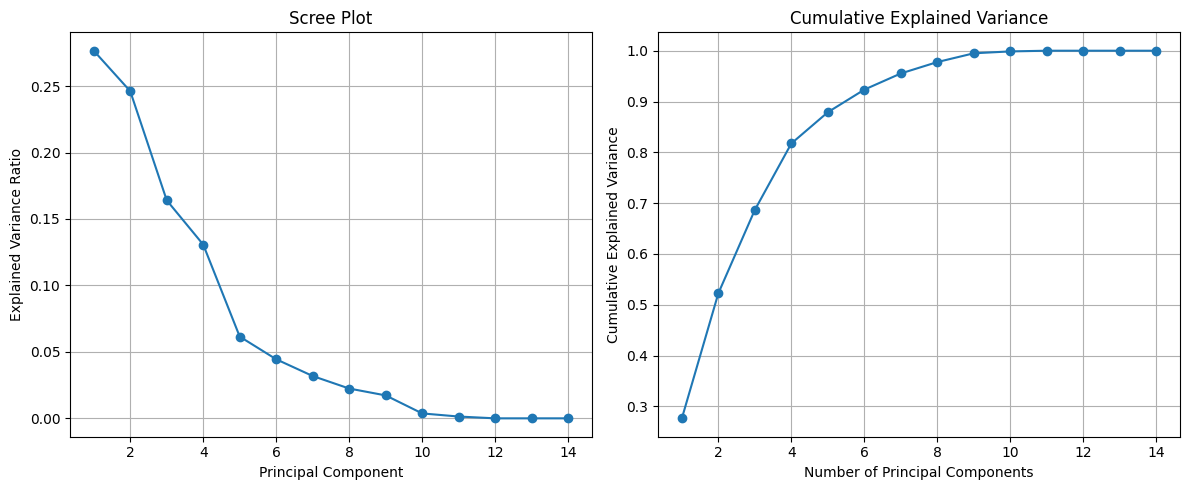

PCA for Regression


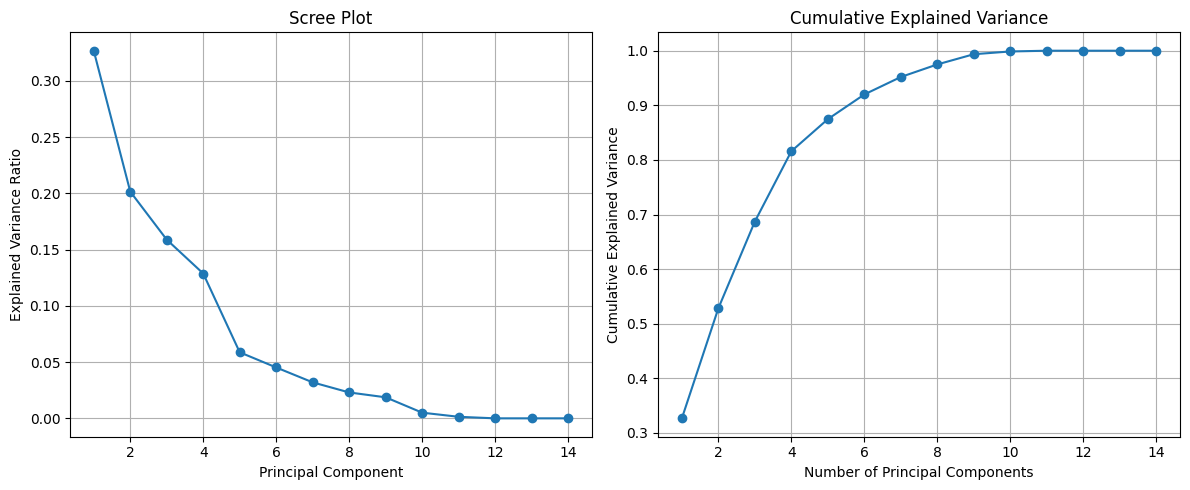

In [15]:
def PCA_features(dataset):
    scaler = StandardScaler()
    dataset_scaled = scaler.fit_transform(dataset) # Scaled Features
    
    pca = PCA()
    pca.fit(dataset_scaled) # PCA on Scaled Data

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Scree Plot - Explained Variance Plot
    explained_variance_ratio = pca.explained_variance_ratio_
    axes[0].plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
    axes[0].set_title('Scree Plot')
    axes[0].set_xlabel('Principal Component')
    axes[0].set_ylabel('Explained Variance Ratio')
    axes[0].grid(True)

    # Cumulative Explained Variance Plot
    cumulative_explained_variance = np.cumsum(explained_variance_ratio)

    axes[1].plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
    axes[1].set_title('Cumulative Explained Variance')
    axes[1].set_xlabel('Number of Principal Components')
    axes[1].set_ylabel('Cumulative Explained Variance')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

print("PCA for Classification")
PCA_features(feature_train_classification)

print("PCA for Regression")
PCA_features(feature_train_regression)

__We can see from the plots that elbow point around the principal components is approximately equal to the number of features we have chosen. After analysis of the dataset and the outputs of the PCA, we have come to a conclusion that perfoming a PCA does not yield a better result, hence we do not need to use PCA and the original features can be used directly.__

This elbow point indicates number of components capturing sufficient variance to represent the feature data effectively. Based on these plots, 16 principal components is a good amount that retains a high percentage of the total variance while simeltaneously avoiding overfitting on the data.

## Plotting the Visualization Plots of the features.
- The function Visualizes the features using Scatterplots to explore the data.

Here we visualize pairwise relationships between the first 4 features.

In [16]:
def features_plot(dataset, features_plot, column_names, target_label):
    scaler = StandardScaler()
    scaled_dataset = scaler.fit_transform(dataset)
    dataset = pd.DataFrame(data = dataset.iloc[:, :features_plot], columns = column_names)
    dataset['Labels'] = target_label
    
    plot_graph = sns.pairplot(dataset, hue = 'Labels', palette = 'viridis')
    plot_graph.fig.suptitle('Plots of the First ' + str(features_plot) + ' Features', y = 1.02)
    plot_graph.set(yticklabels=[], xticklabels=[])
    plt.show()

Visualization Plots of first 6 features for Classification


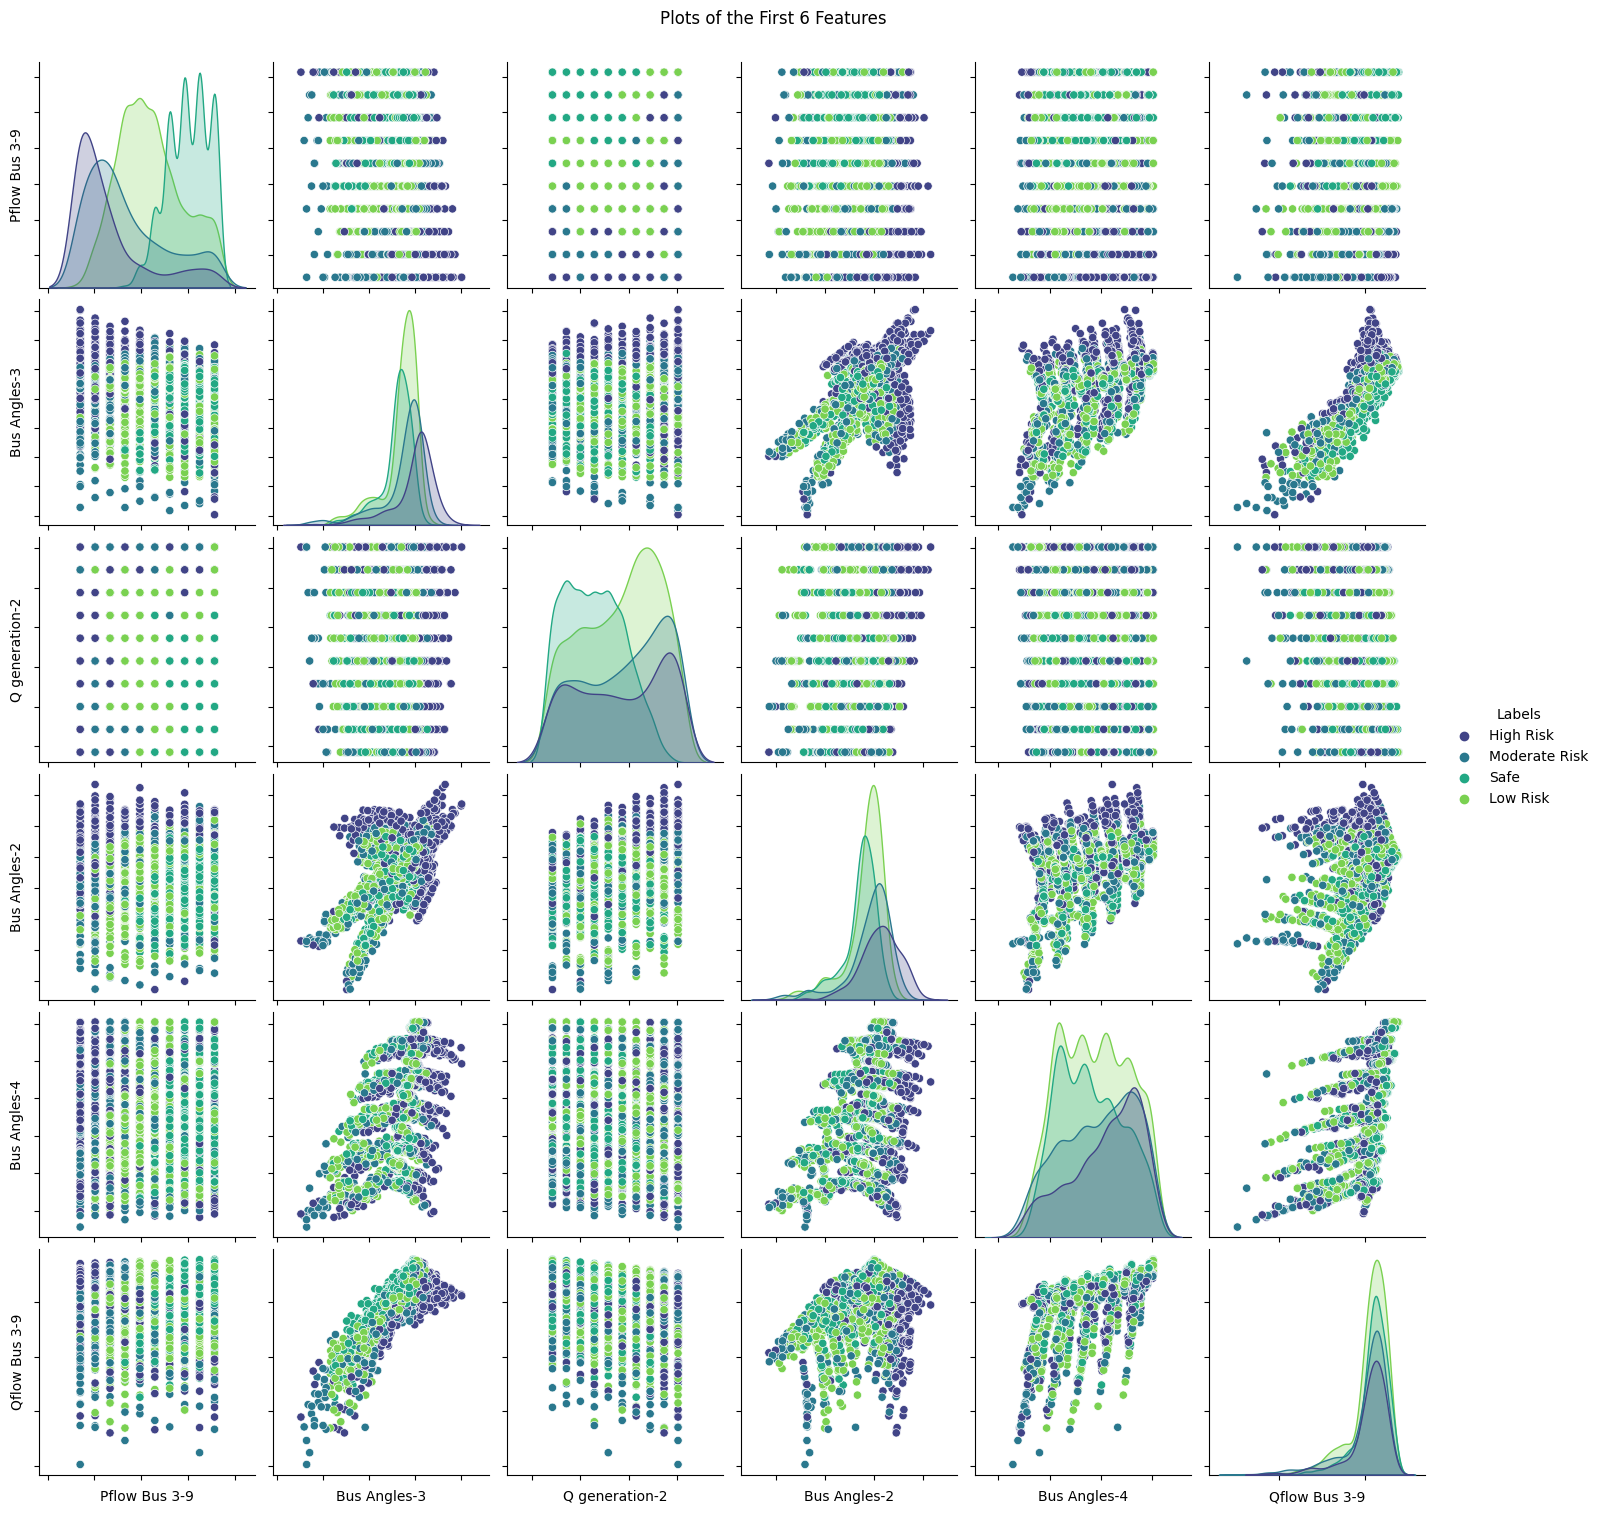

Visualization Plots of first 6 features for Regression


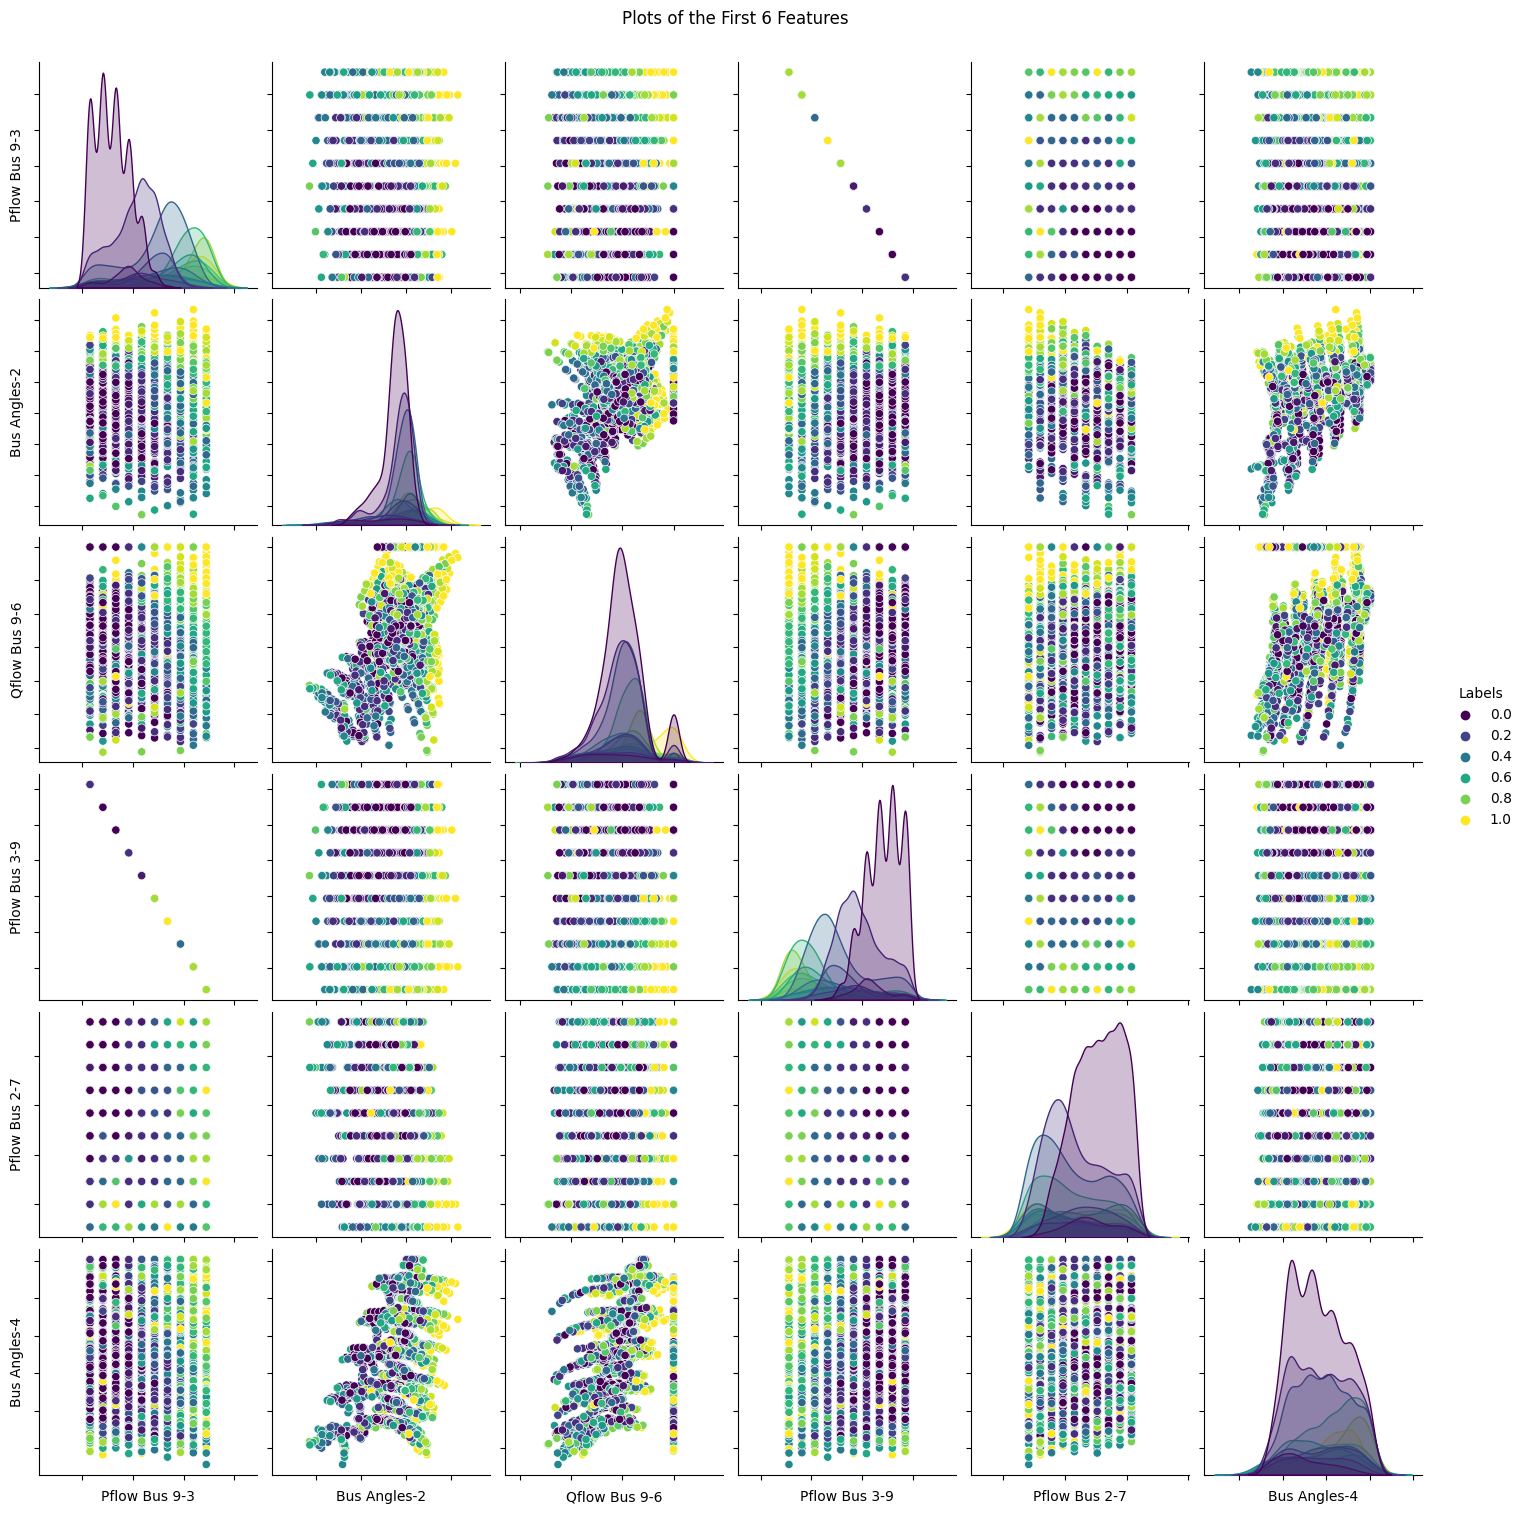

In [17]:
print("Visualization Plots of first 6 features for Classification")
features_plot(feature_train_classification, features_plot = 6, column_names = feature_train_classification.columns[:6], target_label = label_train)
print("Visualization Plots of first 6 features for Regression")
features_plot(feature_train_regression, features_plot = 6, column_names = feature_train_regression.columns[:6], target_label = target_train)

## Univariate analysis of Feature Vectors
By performing a univariate analysis on the continuous columns, we can get a sense of the distrbution of values in every column and of the outliers in the data. Histograms are great for plotting the distribution of the data and boxplots are the best choice for visualizing outliers. 

- We construct two functions, one that plots a histogram of all the continuous features and other that plots a boxplot of the same.

In [18]:
feature_train_classification = np.array(feature_train_classification)
feature_train_regression = np.array(feature_train_regression)

In [19]:
# Function to plot histograms
def plot_histogram(dataset):
    n_samples, n_features = dataset.shape
    n_subplot_rows = int(np.ceil(np.sqrt(n_features)))
    n_subplot_cols = int(np.ceil(n_features / n_subplot_rows))
    fig, axes = plt.subplots(n_subplot_rows, n_subplot_cols, figsize=(16, 9))
    if n_features == 1:
        axes = np.array([axes])
    
    # Plotting histograms
    for i in range(n_features):
        row_idx = i // n_subplot_cols
        col_idx = i % n_subplot_cols
        sns.distplot(dataset[:, i], bins=40, ax=axes[row_idx, col_idx])  # Adjust the number of bins as needed
        axes[row_idx, col_idx].set_title(f"Feature {i + 1}")
        axes[row_idx, col_idx].set_ylabel("Density")
    
    # Hiding empty plots
    for i in range(n_features, n_subplot_rows * n_subplot_cols):
        row_idx = i // n_subplot_cols
        col_idx = i % n_subplot_cols
        fig.delaxes(axes[row_idx, col_idx])
    
    plt.tight_layout()
    plt.show()

# Function to plot boxplots
def plot_boxplots(dataset):
    n_samples, n_features = dataset.shape
    n_subplot_rows = int(np.ceil(np.sqrt(n_features)))
    n_subplot_cols = int(np.ceil(n_features / n_subplot_rows))
    fig, axes = plt.subplots(n_subplot_rows, n_subplot_cols, figsize=(16, 9))
    if n_features == 1:
        axes = np.array([axes])
    
    # Plotting histograms
    for i in range(n_features):
        row_idx = i // n_subplot_cols
        col_idx = i % n_subplot_cols
        sns.boxplot(dataset[:, i], ax=axes[row_idx, col_idx])  # Adjust the number of bins as needed
        axes[row_idx, col_idx].set_title(f"Feature {i + 1}")
        axes[row_idx, col_idx].set_ylabel("Density")
    
    # Hiding empty plots
    for i in range(n_features, n_subplot_rows * n_subplot_cols):
        row_idx = i // n_subplot_cols
        col_idx = i % n_subplot_cols
        fig.delaxes(axes[row_idx, col_idx])
    
    plt.tight_layout()
    plt.show()

Univariate analysis of classification feature vector - Histogram


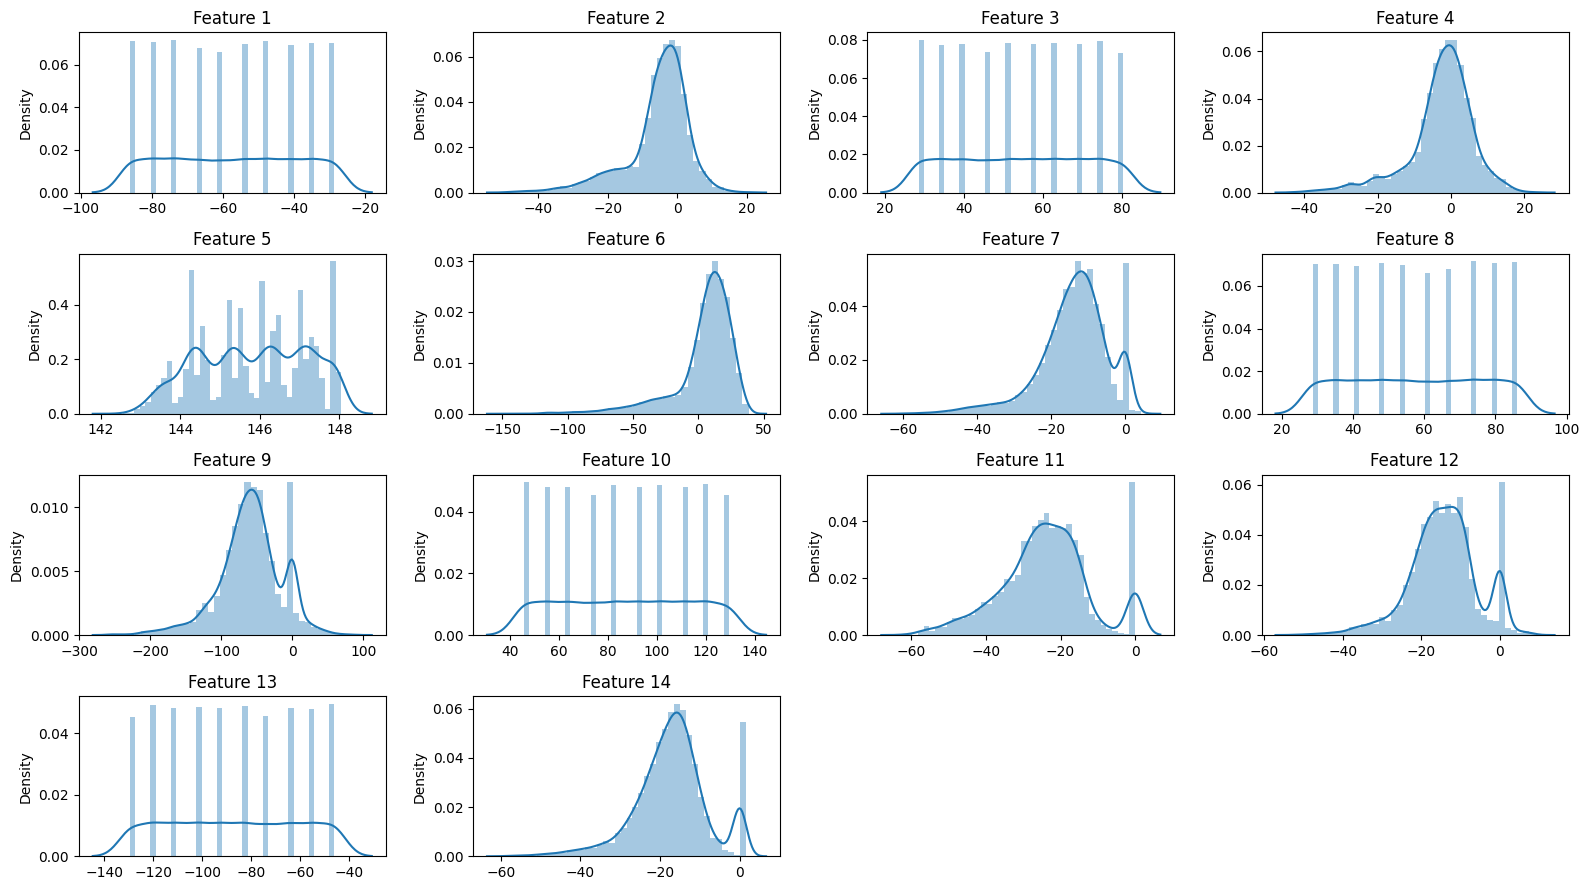

Univariate analysis of classification feature vector - Box Plots


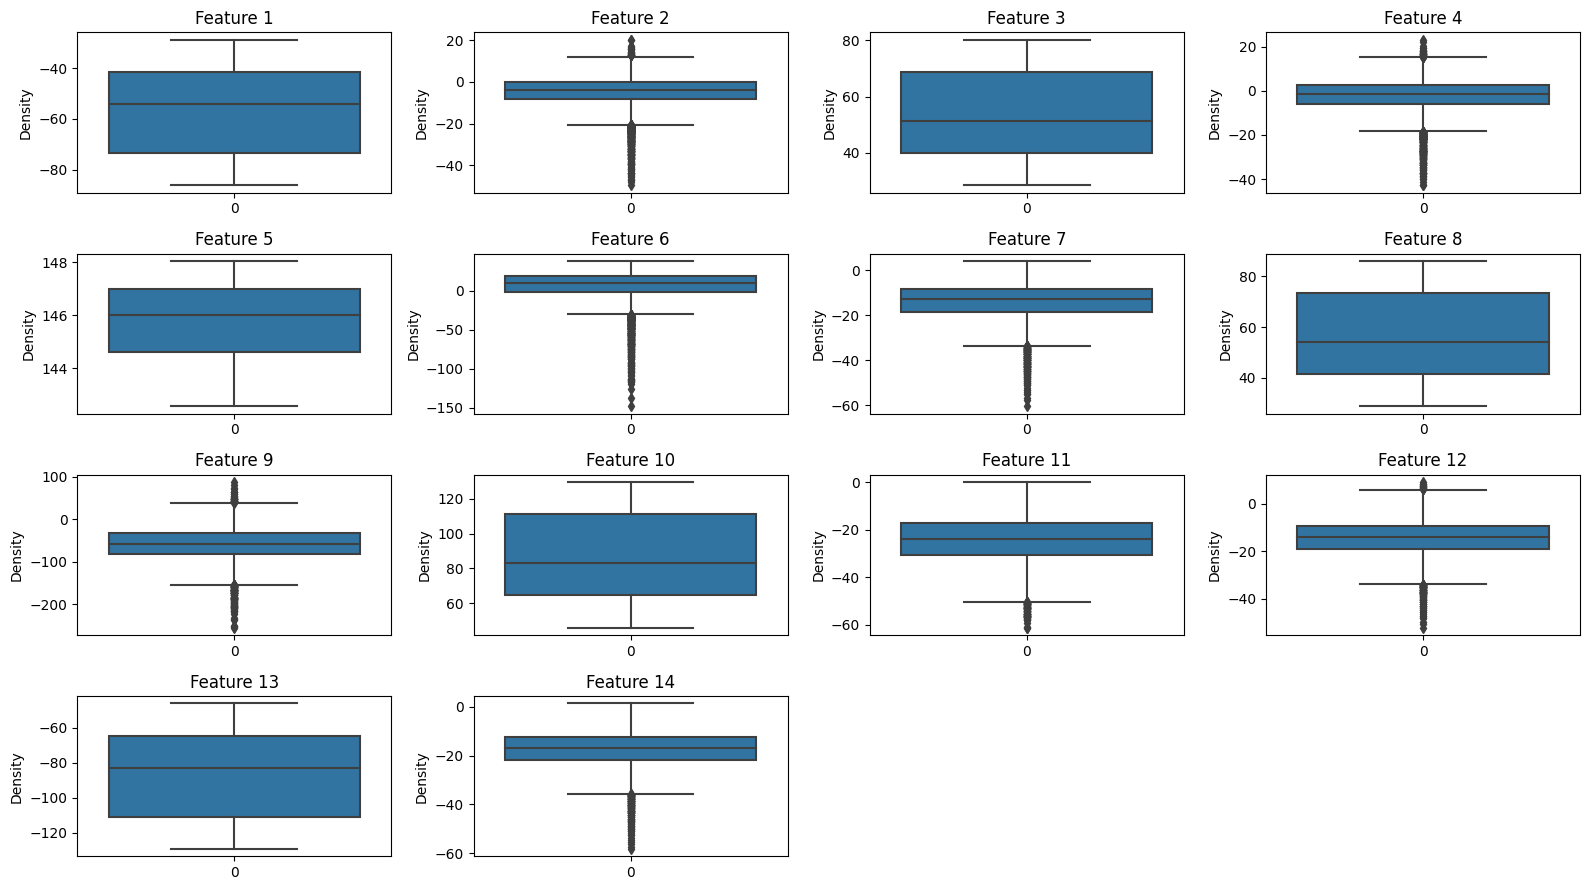

Univariate analysis of regression feature vector - Histogram


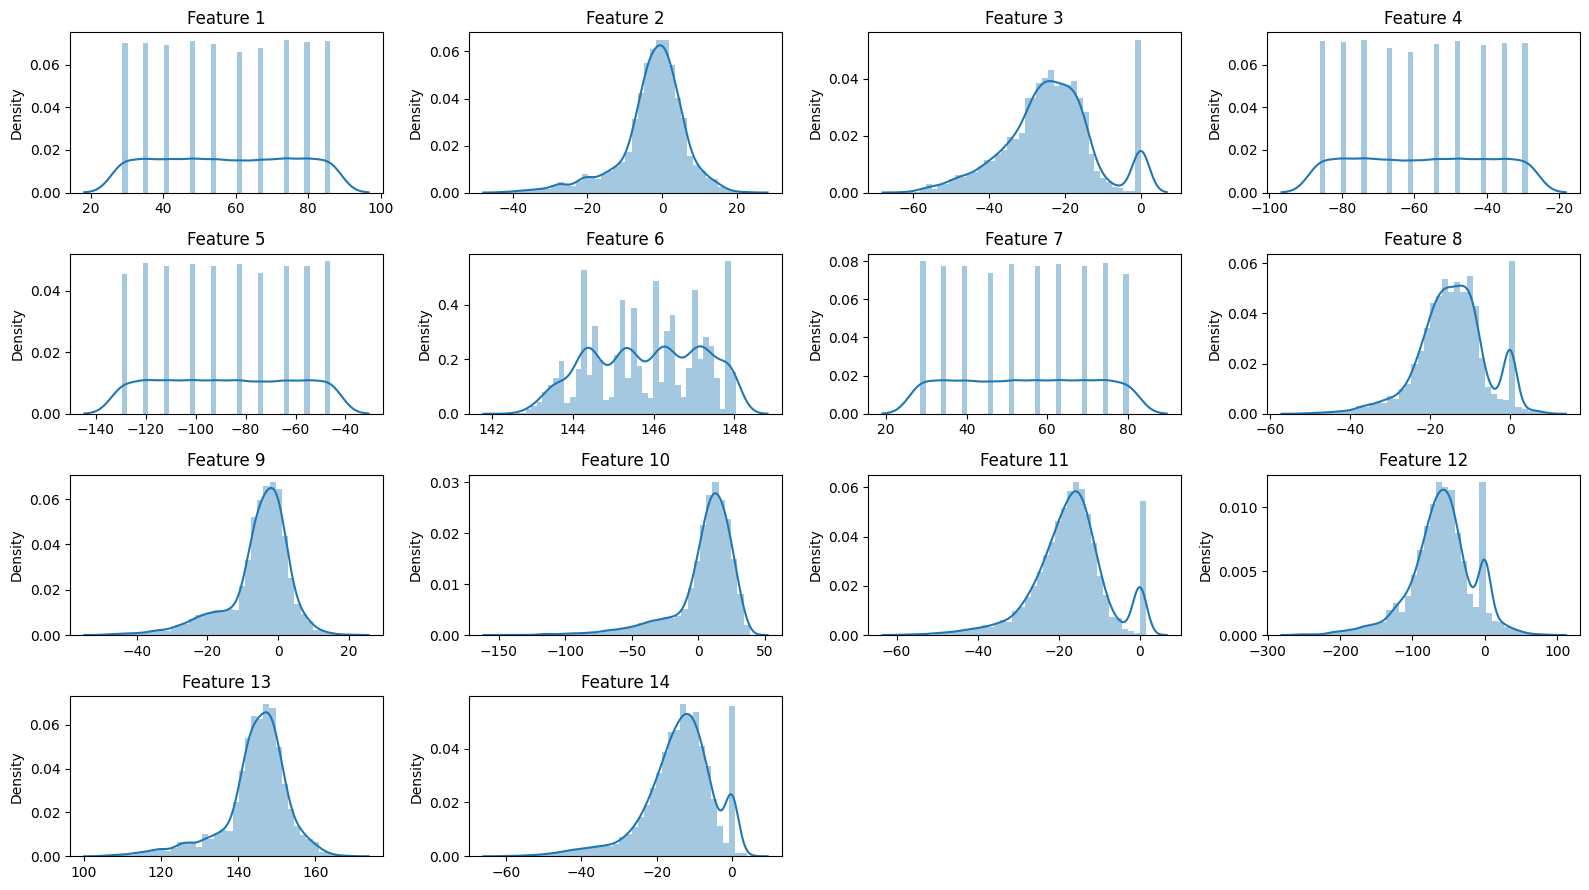

Univariate analysis of regression feature vector - Box Plots


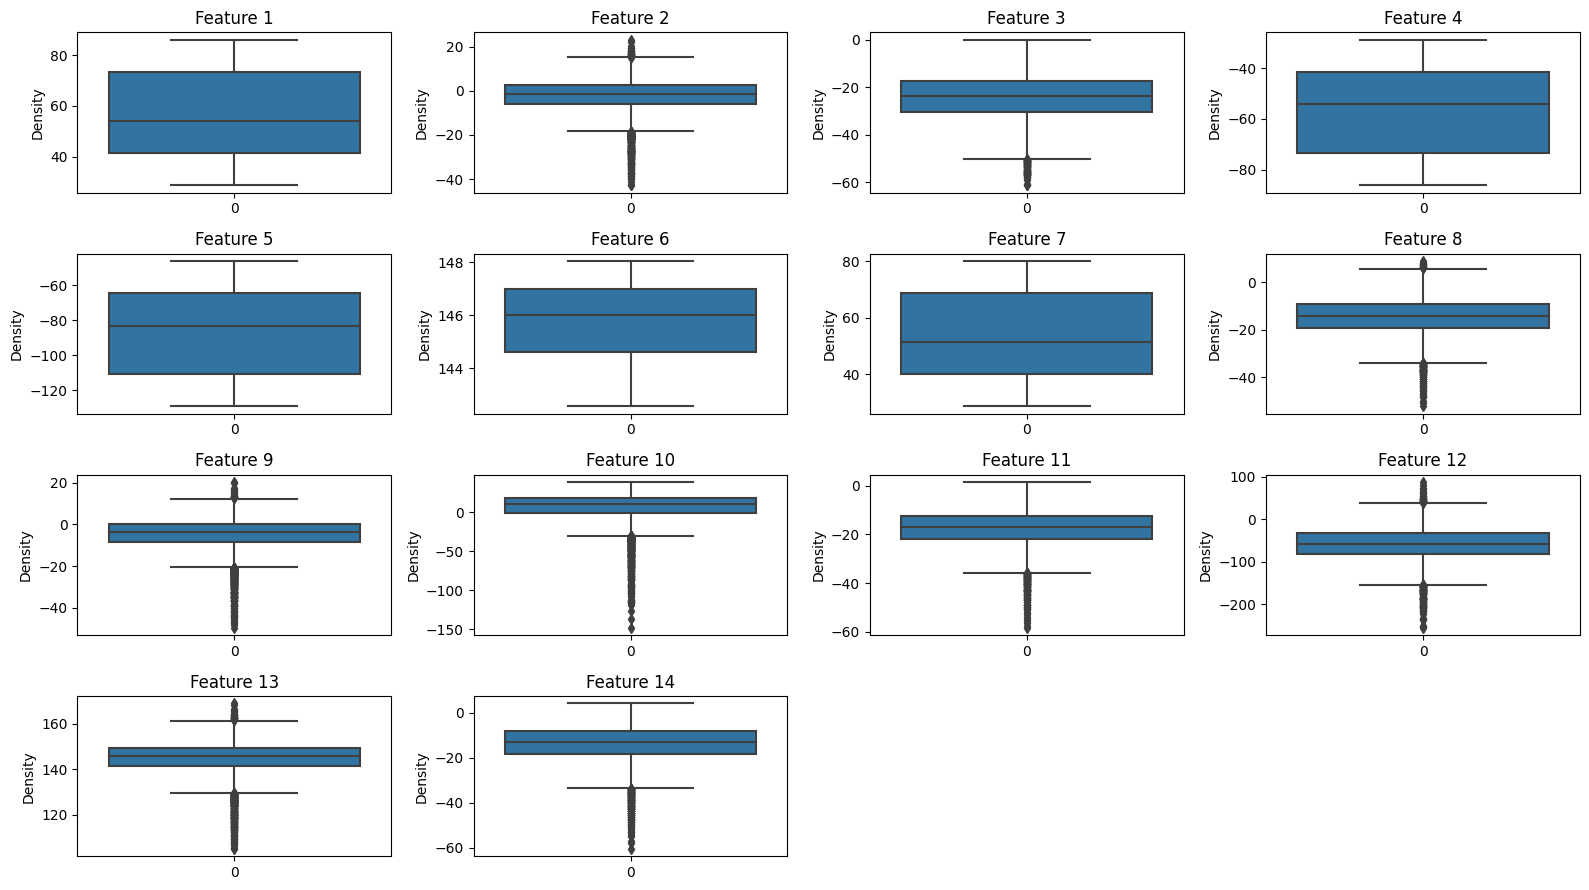

In [20]:
print("Univariate analysis of classification feature vector - Histogram")
plot_histogram(feature_train_classification)
print("Univariate analysis of classification feature vector - Box Plots")
plot_boxplots(feature_train_classification)

print("Univariate analysis of regression feature vector - Histogram")
plot_histogram(feature_train_regression)
print("Univariate analysis of regression feature vector - Box Plots")
plot_boxplots(feature_train_regression)  

- As we can see from the histogram, some of the features are heavily skewed hence we can try to normalize and scale the features so that we can get a gaussian representation of the features.

## Normalize and Scale the Features using Z-Score Normalization (Standardization):

- The function below uses `Z-Score Normalization` and scales the features to have a Mean (**µ**) of 0 and a Standard Deviation (**σ**) of 1
- We later use the previous function to plot the histogram distribution and box plots of the scaled features.

In [21]:
def feature_scaling(features):
    # Z-score normalization for each feature
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    normalized_data = (features - mean) / std
    return normalized_data

feature_train_classification = feature_scaling(feature_train_classification)
feature_train_regression = feature_scaling(feature_train_regression)

Histogram distribution of classification feature vector after scaling


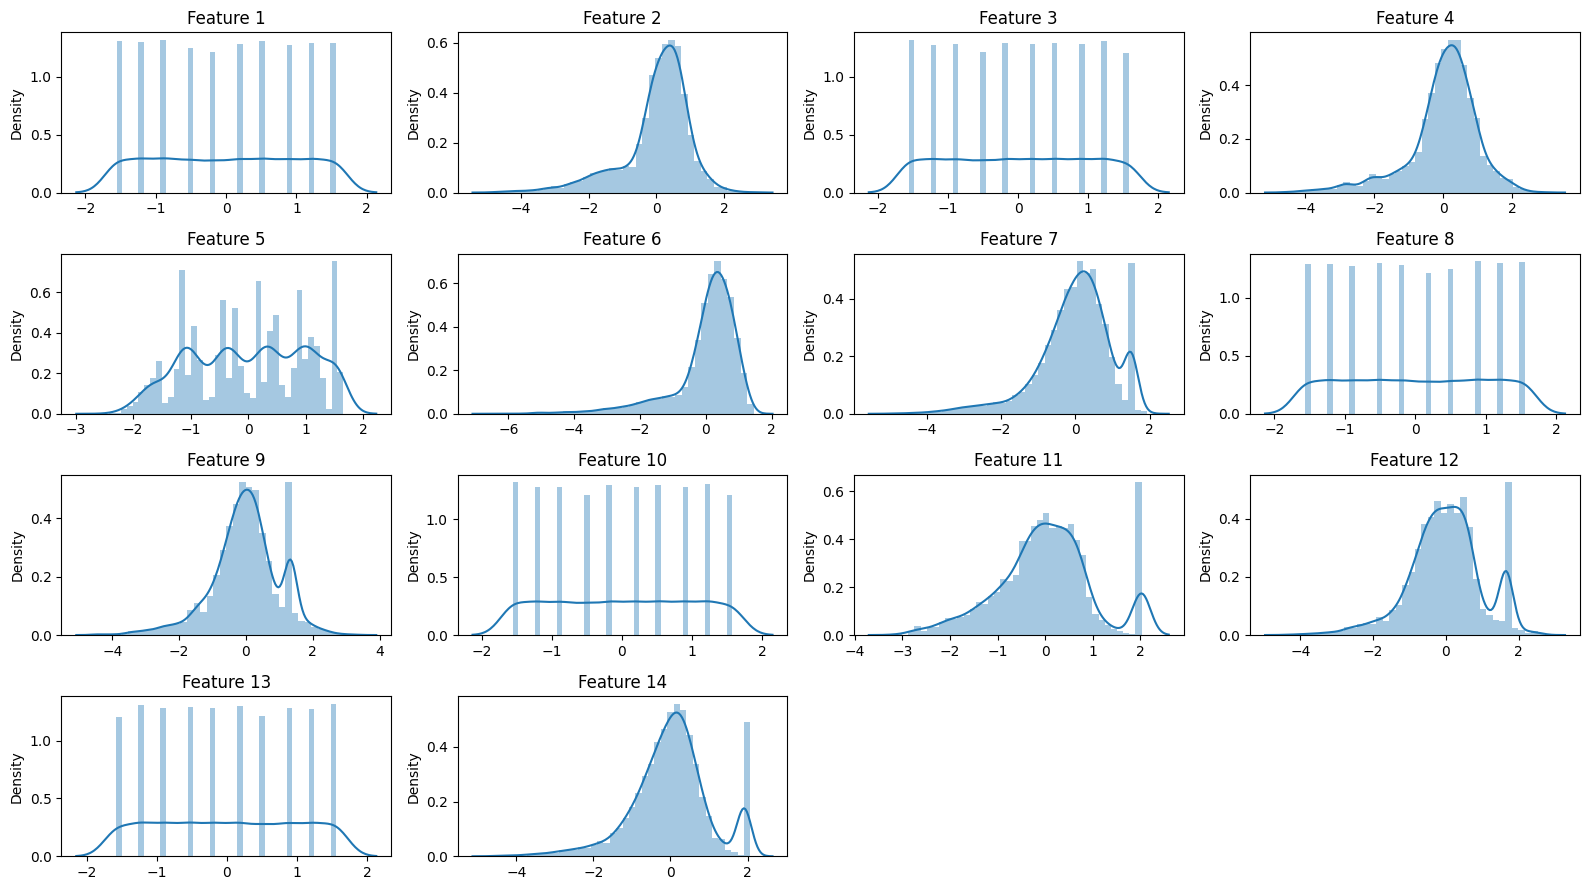

Boxplot distribution of classification feature vector after scaling


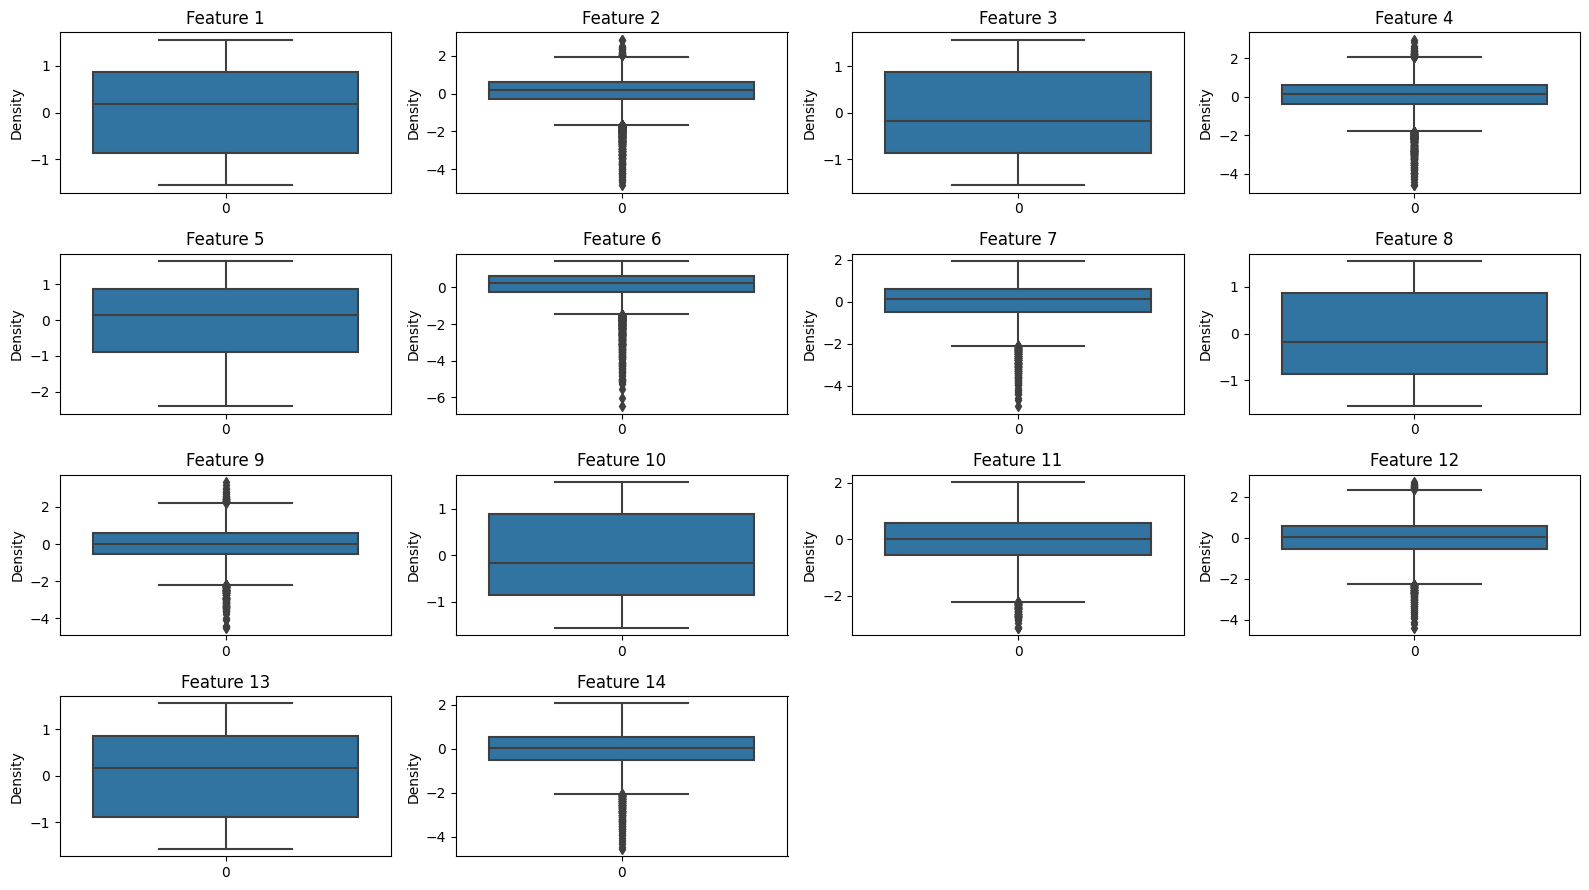

Histogram distribution of regression feature vector after scaling


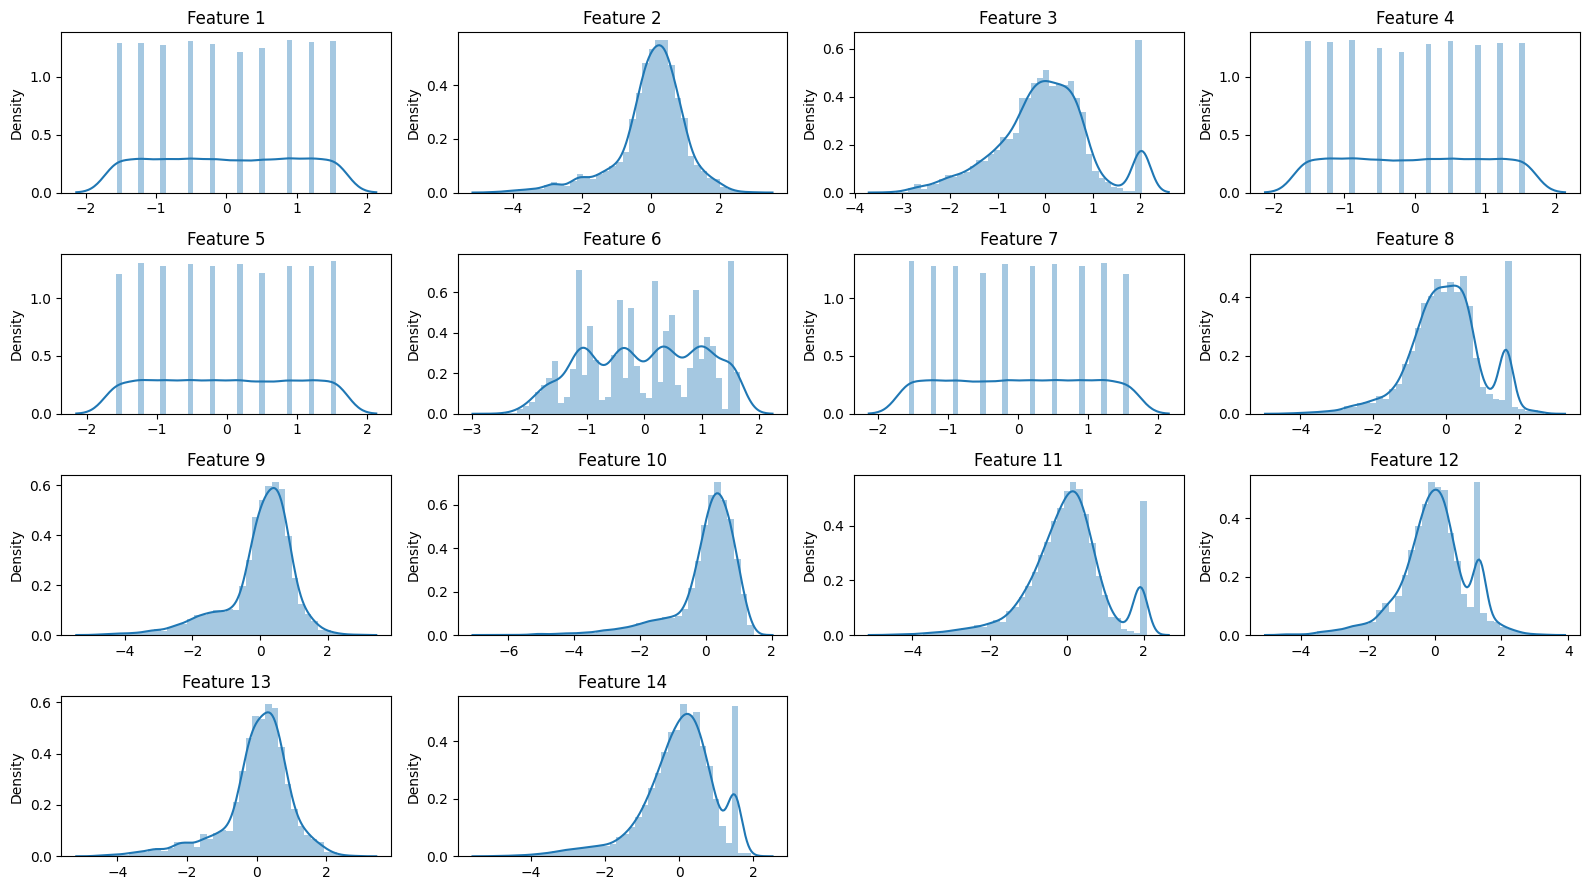

Boxplot distribution of regression feature vector after scaling


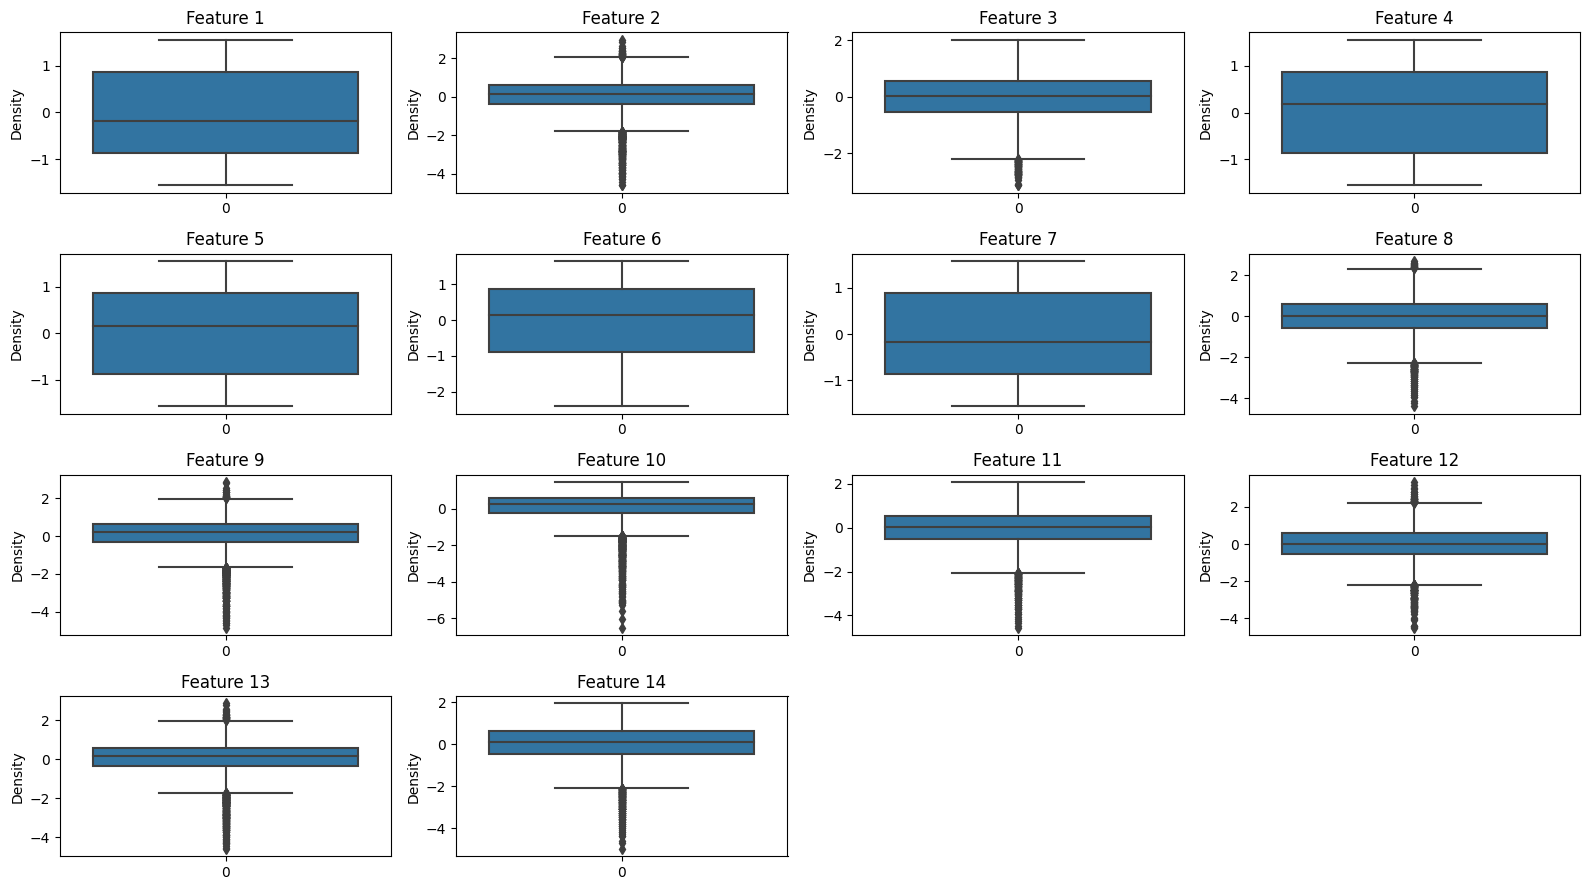

In [22]:
print("Histogram distribution of classification feature vector after scaling")
plot_histogram(feature_train_classification)  
print("Boxplot distribution of classification feature vector after scaling")
plot_boxplots(feature_train_classification)

print("Histogram distribution of regression feature vector after scaling")
plot_histogram(feature_train_regression)  
print("Boxplot distribution of regression feature vector after scaling")
plot_boxplots(feature_train_regression)

- As per the observations from histogram and box plots, the features are scaled with a 0 mean. Some features and lack a good distribution and also have presence of outliers, that makes the features skewed. We need to detect the outliers and proceed further with out analysis

## Detecting outliers in the Feature Columns

Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.
One method of defining outliers is as follows - 
- Outliers are data points lying beyond specific quartiles of datapoints. So we try to determine if a data point is extreme compared to the interquartile range.
- Here, IQR - Inter Quartile Range which is the subtraction of Third and First quartile and the threshold for IQR is [1.5](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097), which we have selected depending on the visual representations as seen in boxplots and check if a data point is an outlier if it falls farther than three standard deviations. 
- When scale is taken as 1.5, then according to IQR Method any data which lies beyond 2.7σ from the mean (μ), on either side, shall be considered as outlier. And this decision range is the closest to what Gaussian Distribution tells us, i.e., 3σ.

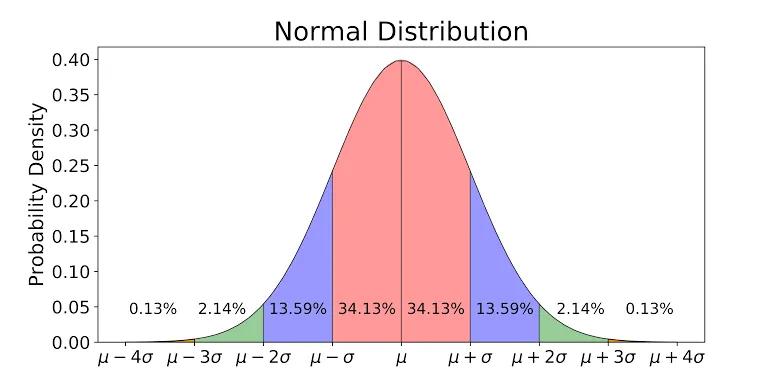

- The function below takes a feature array 'feature_train_classification' and outputs the number of outliers in every numeric feature based on the above rule of *IQR*
- The function also ploys a box_plot of features which also shows the outliers as dots. 

Outlier Detection for Scaled Classification Features


Feature  Outliers
0    Feature_1         0
1    Feature_2       338
2    Feature_3         0
3    Feature_4       287
4    Feature_5         0
5    Feature_6       351
6    Feature_7       167
7    Feature_8         0
8    Feature_9       155
9   Feature_10         0
10  Feature_11        78
11  Feature_12       112
12  Feature_13         0
13  Feature_14       135

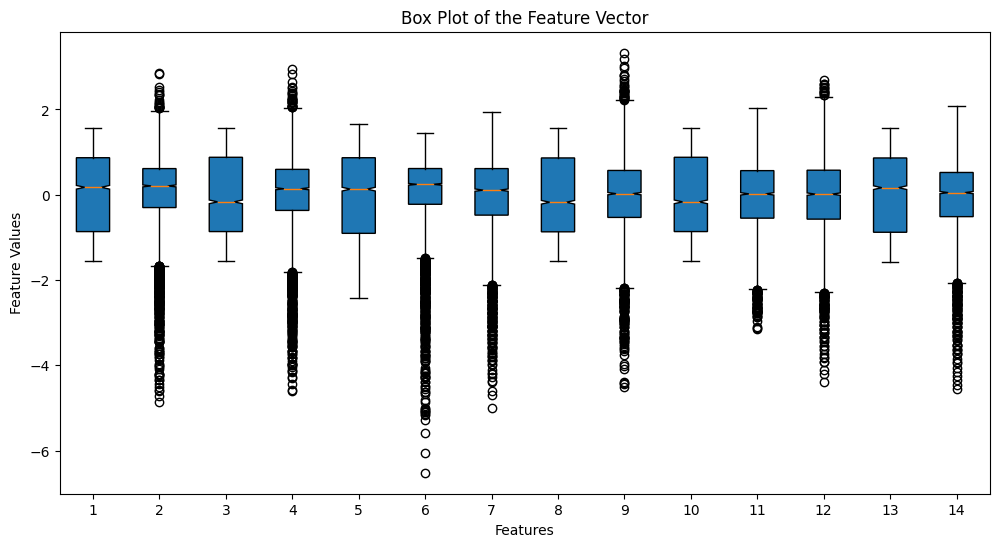

Outlier Detection for Scaled Regression Features


Feature  Outliers
0    Feature_1         0
1    Feature_2       287
2    Feature_3        78
3    Feature_4         0
4    Feature_5         0
5    Feature_6         0
6    Feature_7         0
7    Feature_8       112
8    Feature_9       338
9   Feature_10       351
10  Feature_11       135
11  Feature_12       155
12  Feature_13       303
13  Feature_14       167

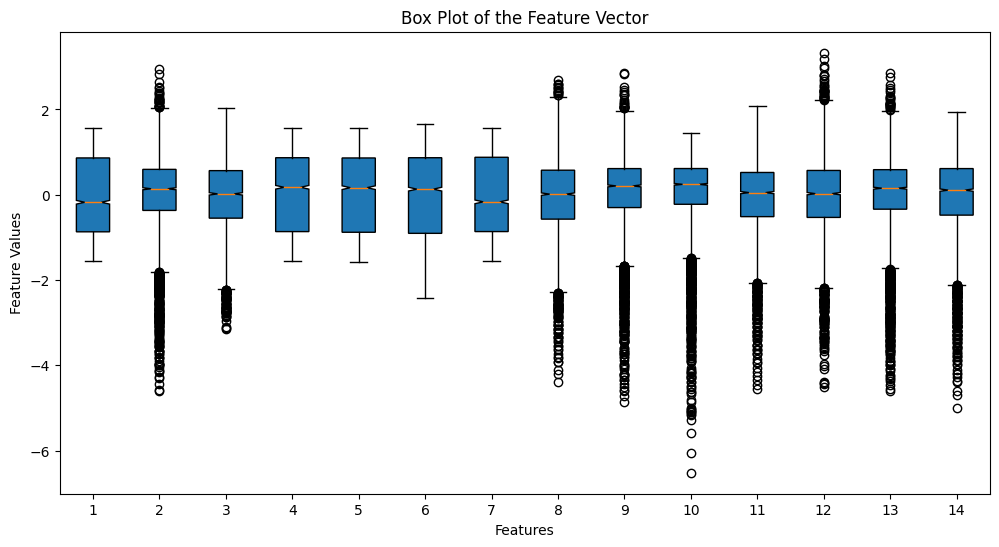

In [23]:
def detect_outliers(features):
    outliers_count_per_feature = {}
    for feature_index in range(0, features.shape[1]):
        feature_data = features[:, feature_index]
        q1 = np.percentile(feature_data, 25) # First quartile (Q1)
        q3 = np.percentile(feature_data, 75) # Third quartile (Q3)
        iqr = q3 - q1 # Interquartile range (IQR)
        lower_bound = q1 - 1.5 * iqr # Lower Bound
        upper_bound = q3 + 1.5 * iqr # Upper Bound
        feature_outliers = [x for x in feature_data if x < lower_bound or x > upper_bound]
        outliers_count_per_feature[f"Feature_{feature_index + 1}"] = len(feature_outliers)
    
    # DataFrame to display the outliers
    display(pd.DataFrame(outliers_count_per_feature.items(), columns=["Feature", "Outliers"]))
    plt.figure(figsize=(12, 6))
    plt.boxplot(features, notch=True, vert=True,  patch_artist=True)
    plt.xlabel('Features')
    plt.ylabel('Feature Values')
    plt.title('Box Plot of the Feature Vector')
    plt.show()

print("Outlier Detection for Scaled Classification Features")
detect_outliers(feature_train_classification)
print("Outlier Detection for Scaled Regression Features")
detect_outliers(feature_train_regression)

## Treating outliers in the features

- Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
- For treating the outliers we can use **[Winsorization](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html)**. In this method we define a confidence interval of 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

#### __Although, we have written the function below to perform Winzorization, we will not treat outliers.__
- We believe that outliers play a critical role in predicting the out of the box situations (risk of grid failure) in our case. Hence, their value increases and trating them will impact the prediction negatively.

In [24]:
# Function to treat outliers 
def treat_outliers(features):
    lower_threshold = np.percentile(features, 5)
    upper_threshold = np.percentile(features, 95)
    winsorized_data = np.where(features < lower_threshold, lower_threshold, features)
    winsorized_data = np.where(features > upper_threshold, upper_threshold, winsorized_data)
    return winsorized_data

# feature_train_classification = treat_outliers(feature_train_classification)
# feature_train_regression = treat_outliers(feature_train_regression)

- Using Winsorization of the normalized and scaled features has resulted in removal of all the outliers present past 5% and 95% quartiles as per the above function.

## Check for Class Imbalance

Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. 

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance. 

- The function below takes the target variable of label and outputs the distribution of classes in the target.

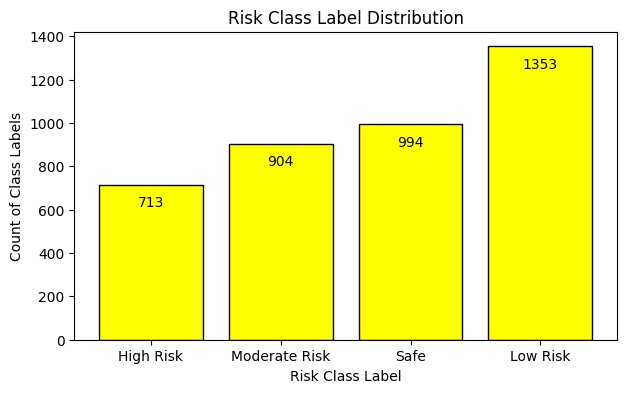

In [25]:
def class_imbalance(label):
    categories, counts = zip(*Counter(label).items())
    plt.figure(figsize=(7, 4))
    plt.bar(categories, counts, color='yellow', edgecolor='black')
    for i, j in enumerate(counts):
        plt.text(x = i, y = j-100, s = str(j), horizontalalignment='center')
    plt.xlabel('Risk Class Label')
    plt.ylabel('Count of Class Labels')
    plt.title('Risk Class Label Distribution')
    plt.show()

class_imbalance(label_train)

__The class distribution in the target is has a clear indication of imbalance, this can be further explained using the function below which plots the distribution of the target class for univariate analysis__

## Encoding Labels for Classification

In this step, we prepare the target labels for the classification task. The original labels are ordinal & categorical, representing different risk levels: __`Safe`, `Low Risk`, `Moderate Risk`, `High Risk`__. To make these labels compatible with machine learning models, we need to convert them into numerical form. Given that these labels have an inherent order of importance and sensitivity, we opt for label encoding.

- Encoding of label assigns numerical value to categories preserving the order of the data.
- In this case, we assign labels in ascending order, starting from 1 for "Safe," 2 for "Low Risk," 3 for "Moderate Risk," and 4 for "High Risk." This encoding reflects the increasing levels of risk and sensitivity associated with each label.
- The reason we assign a higher value to the "High Risk" label is to convey its elevated importance and the need for greater sensitivity in its identification. High-risk situations often involve potentially severe consequences of grid failure and significant implications. Therefore, it is crucial to ensure that our model can accurately classify instances as "High Risk" to mitigate potential negative outcomes.

In the function below we will perform label encoding on labels in the  dataset.

In [26]:
# Function that auto encodes labels.
class_order = ["Safe", "Low Risk", "Moderate Risk", "High Risk"]
def encode_labels(label_train, class_order):
    mapping = {class_name: i + 1 for i, class_name in enumerate(class_order)}
    # Encode the labels based on the order
    encoded_labels = [mapping[label] for label in label_train]
    return np.array(encoded_labels)

encoded_label_train = encode_labels(label_train, class_order)
print(encoded_label_train)

[4 3 1 ... 1 3 4]


#### We further create a function to decode the numerical labels back to categorical forms.
This needs to be done at the time of prediction result displays and plotting. The function below does the same. We use inverse_transform to decode the encoded labels by subtracting 1 from each encoded value to account for the shift we applied during encoding

In [27]:
# Function that auto decodes labels.
def decode_labels(encoded_labels, class_order):
    reverse_mapping = {i + 1: class_name for i, class_name in enumerate(class_order)}
    # Decode the labels based on the specified order
    decoded_labels = [reverse_mapping[encoded_label] for encoded_label in encoded_labels]
    return np.array(decoded_labels)

decoded_label_train = decode_labels(encoded_label_train, class_order = ["Safe", "Low Risk", "Moderate Risk", "High Risk"])
print(decoded_label_train)

['High Risk' 'Moderate Risk' 'Safe' ... 'Safe' 'Moderate Risk' 'High Risk']


## Solving the Class Imbalance Problem - Minority Oversampling

Since the target is imbalanced, we apply [Synthetic Minority Oversampling (SMOTE)](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) for undersampling and oversampling the majority and minority classes in the target respectively.
__SMOTE should always be applied only on the training data and not on the validation and test data__. Hence we create a function to solve the class imbalance problem which will be applied on training data after the train test split.

This balanced dataset will be used further in regression and classification task. The function below takes the target variable and solves the imbalance in the distribution of classes.

In [28]:
def solve_imbalance(feature, target):
    smote = SMOTE(random_state = 42)
    # Applying SMOTE to balance the classes
    X_resampled, y_resampled = smote.fit_resample(feature, target)
    return X_resampled, y_resampled

# Balanced vectors
feature_train_classification, encoded_labels_train = solve_imbalance(feature_train_classification, encoded_label_train)

#### Checking if the balance has been introduced in the classes and display the balanced distribution per class on the graph

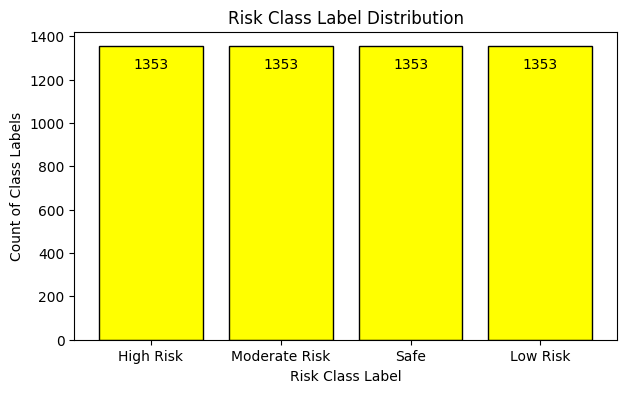

In [29]:
class_imbalance(decode_labels(encoded_labels_train, class_order = ["Safe", "Low Risk", "Moderate Risk", "High Risk"]))

#### For Model Training and Task 2 and 3 of Regresssion and Classification we will use the following arrays
- Features to train the model and validate it: __`feature_train_regression`__ and __`feature_train_classification`__
- Target Value specifing the Risk Factor (Regression) to train the model and validate it: __`target_train`__
- Target Label specifing the Class of Risk (Classification) to train the model and validate it: __`encoded_labels_train`__

In [30]:
print("Classification Train/Validation Features Shape:", feature_train_classification.shape)
print("Regression Train/Validation Features Shape:",feature_train_regression.shape)
print("Target Train/Validation Label Shape:",encoded_labels_train.shape)
print("Target Train/Validation Value Shape:", target_train.shape)

Classification Train/Validation Features Shape: (5412, 14)
Regression Train/Validation Features Shape: (3964, 14)
Target Train/Validation Label Shape: (5412,)
Target Train/Validation Value Shape: (3964,)


## __Conclusion from Task 1__
- We have performed data-preprossing steps on the data, which include __`feature selection`__, __`feature engineering with data scaling`__, outlier detection, target class __`imbalance resolution`__ and __`encoding`__.
- Thus we have obtained the preprocessed features and target values/labesl foor further training our ML models for tast 2 and task 3 which are regression and classification for predicting the risk values and risk classes respectively.
- The final arrays of features and target\labels is mentioned above and will be used for further computation.

__=============================================================================================================__

# Task 2 - Developing a model to predict Risk Factor

##### Below is a Python function that takes training data, performs regression using a machine learning model
- In this function:
    - __`reg`__ is the regression model we want to evaluate
    - __`feature`__ and __`target`__ are the Feature Vector and Target array we use to train and test our model on
    - __`x_train`__ and __`y_train`__ are our feature and target data for train the regression model
    - __`x_test`__ and __`y_test`__ are the testing features and target values for evaluating the regression model
    - It generates performance metrics such MSE (Mean Square Error) and R2 (R Sqaured) Score

In [31]:
def Regressor(reg, feature, target):
    x_train, x_test, y_train, y_test = train_test_split(feature, target, train_size = 0.8, random_state = 42)
    
    # Fit the model
    model = reg.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)

    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting line graph of actual vs. predicted values for first 50 points
    axes[0].plot(y_test[0:61], label='Actual Data', marker='o',linewidth = 0.7, linestyle='-', color='orange')
    axes[0].plot(y_pred[0:61], label='Predicted Data', marker='o',linewidth = 0.7, linestyle='-', color='deepskyblue')
    axes[0].set_xlabel('Samples')
    axes[0].set_ylabel('Risk Factor Values')
    axes[0].legend()

    # Plotting the scatter plot of actual vs. predicted values for first 50 points
    axes[1].scatter(y_test[0:61], y_pred[0:61], color='blue', marker='o')
    axes[1].set_xlabel('Actual Data')
    axes[1].set_ylabel('Predicted Data')
    
    fig.suptitle('Actual vs. Predicted Risk Factor Values for first 60 Data points')
    plt.tight_layout()
    plt.show()

## Performance of four different Machine Learning models

In this analysis, we explore the performance of four different machine learning models: Support Vector Machine Regressor (SVM - SVR) with a radial basis function (RBF) kernel, SVM-SVR with a polynomial kernel, Linear Regressor, Ridge Regressor and Random Forest Regressor. Each of these models has its unique characteristics and is suited for different types of data and tasks:

1. __SVR with RBF Kernel__: SVM-SVR is utilizes the principles of Support Vector Machines (SVM) for regression tasks. It uses a radial basis function (RBF) kernel to map the input data into a higher-dimensional space. SVR aims to find a hyperplane that best fits the data while maximizing the margin between data points and the hyperplane. The RBF kernel captures complex, non-linear relationships between features and the target variable.
2. __SVR with Polynomial Kernel__: Similar to the RBF, SVM-SVR can also use a polynomial kernel to map data into a higher-dimensional space.
The polynomial kernel is particularly useful for capturing non-linear relationships with polynomial functions and allows to control the degree of the polynomial and adjust model complexity.
3. __Linear Regression__: Linear regression simple model that determines relationship between the features and the target variable as a linear equation. The goal is to find the best-fitting linear relationship that minimizes the sum of squared errors between the predicted and actual values. Linear regression is suitable for capturing linear relationships between features and the target.
4. __Ridge Regression__: Ridge regression is a variant of linear regression that introduces L2 regularization. It adds a penalty term to the linear regression loss function, encouraging the model's coefficients to be small. Ridge regression helps prevent overfitting by reducing the magnitude of the coefficients, which can be particularly useful when dealing with high-dimensional data or multicollinearity.
5. __Random Forest Regressor__: Random Forest algorithm combines multiple decision tree regressors to make accurate predictions. It combines the predictions of all the individual decision tree regressors calculates the average or weighted average of the predictions from each tree. n_estimators here is number of trees.

- To evaluate the performance of these models, we use the above created Regressor function that computes key metrics of R2 and MSE
- Also, we generate plots to show the data points of model's predictions with actual target values.

Support Vector Machine Regressor (SVM-SVR) with RBF Kernel
Mean Squared Error:  0.0031344288882717867
R2 Score:  0.9685518155055215


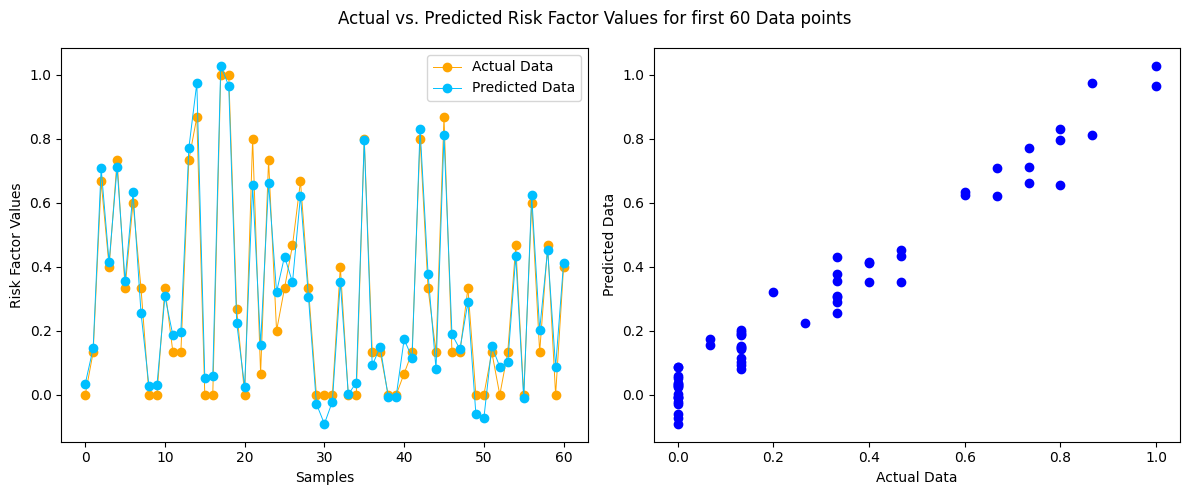

Support Vector Machine Regressor (SVM-SVR) with RBF Kernel
Mean Squared Error:  0.014873108960999267
R2 Score:  0.85077591762821


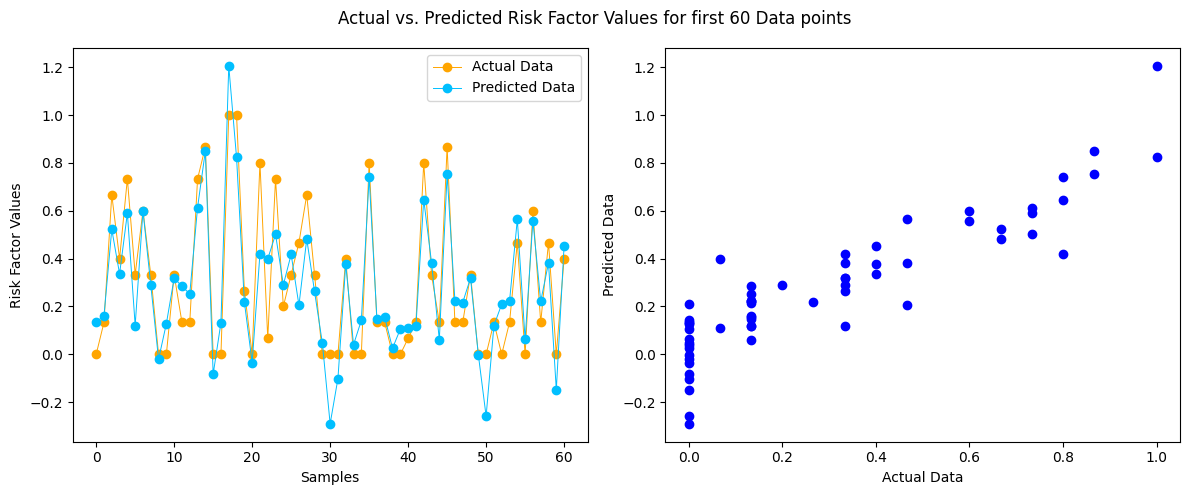

Linear Regression
Mean Squared Error:  0.0370528427693985
R2 Score:  0.6282433971250743


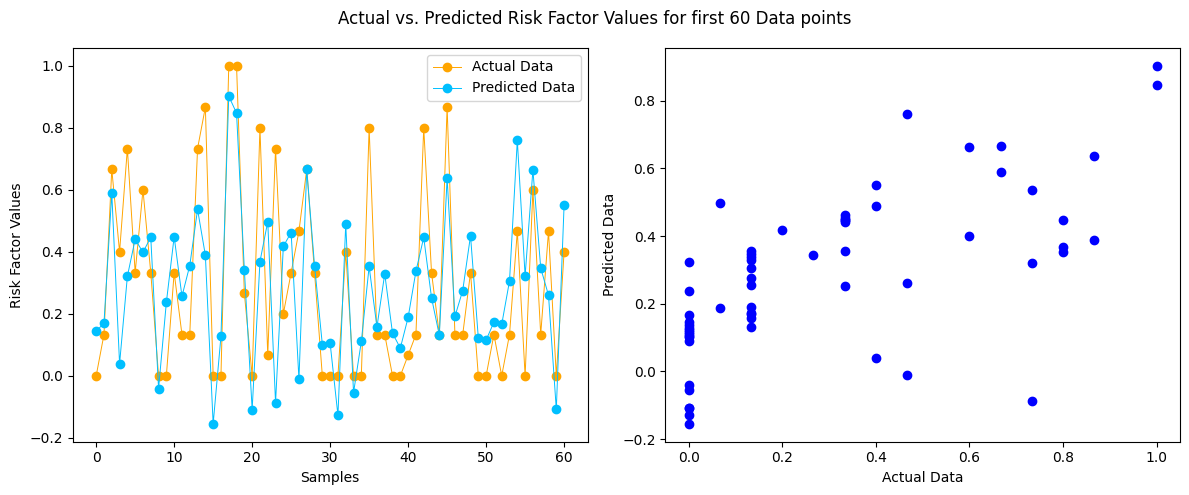

Random Forest Regression
Mean Squared Error:  0.004331111671570689
R2 Score:  0.9565453217256291


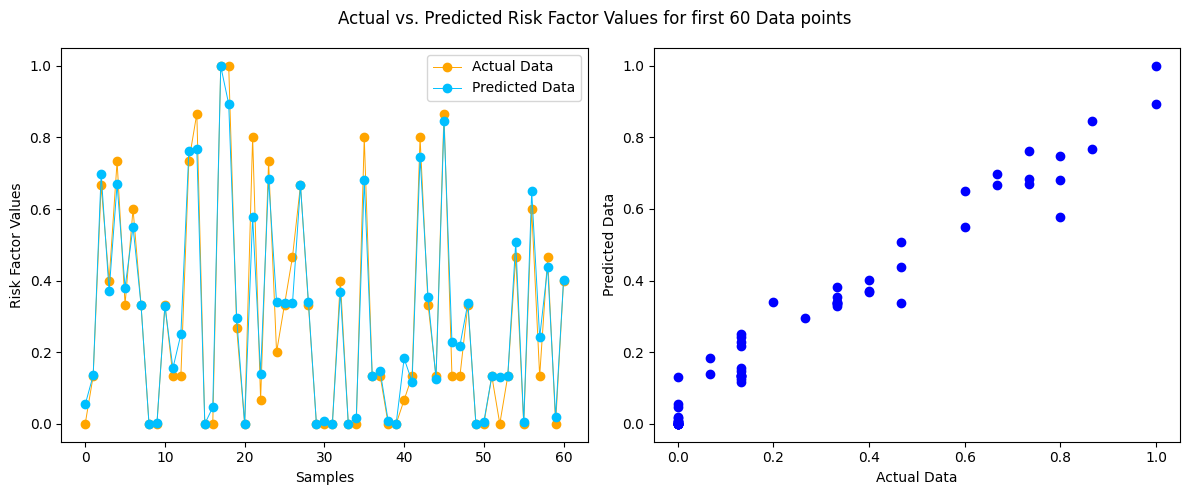

Ridge Regression
Mean Squared Error:  0.036777850613147076
R2 Score:  0.6310024337383111


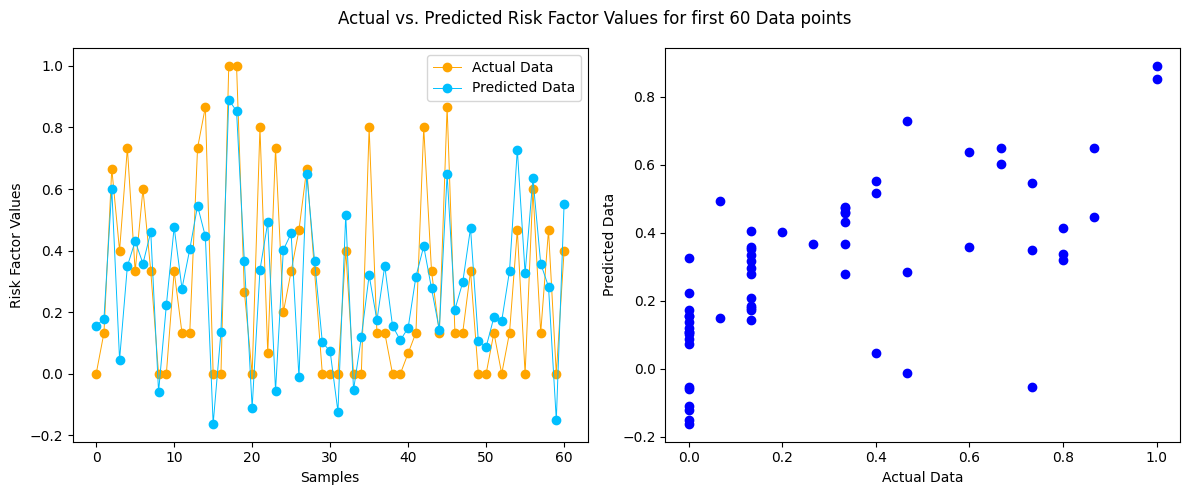

In [32]:
### SVR with rbf kernel
print("Support Vector Machine Regressor (SVM-SVR) with RBF Kernel")
svr_rbf = SVR(kernel='rbf', gamma='scale', max_iter=2500, C=6, epsilon=0.06)
Regressor(svr_rbf, feature_train_regression, target_train)

### SVR with poly kernel
print("Support Vector Machine Regressor (SVM-SVR) with RBF Kernel")
svr_poly = SVR(kernel='poly', gamma='auto', C=50, epsilon=0.001, tol=1e-4)
Regressor(svr_poly, feature_train_regression, target_train)

### Linear Regression
print("Linear Regression")
lin_reg = LinearRegression()
Regressor(lin_reg, feature_train_regression, target_train)

### Random Forest Regressor
print("Random Forest Regression")
random_forest_regressor = RandomForestRegressor(n_estimators=100, min_samples_split=2)
Regressor(random_forest_regressor, feature_train_regression, target_train)

### Ridge Regression
print("Ridge Regression")
ridge_reg = Ridge(alpha=0.01)
Regressor(ridge_reg, feature_train_regression, target_train)

## Hyperparameter Tuning on the SVR with rbf kernal
We take further steps to optimize the SVM-SVR model's performance using hyperparameter tuning. To achieve this, we use GridSearchCV. This process involves systematically exploring various combinations of hyperparameters to find the optimal configuration for our MLP model.

The hyperparameters we cross-validate in this process include:
- **Regularization parameter (C)**: Regualarization Parameter for SVM Regressor
- **epsilon**: epsilon-tube within which no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.
- **gamma**: Kernel coefficient
- __max_iter__: Masimum iterations

Through GridSearchCV, we evaluate these hyperparameters and their combinations to identify the set that yields the best performance for our SVR model. This helps us fine-tune the model to achieve its optimal predictive capabilities.

Ultimately, the output of this process is the determination of the "Best Hyperparameters for MLP Classifier" which represent the most suitable parameter configuration for our SVR model.

---- __Do not run, takes a lot of time__

In [49]:
### SVR with rbf kernel
print("Support Vector Machine Regressor (SVM-SVR) with RBF Kernel")
param_grid = {'C': [0.1, 1, 3, 6, 8], 'epsilon': [0.01, 0.06, 0.08, 0.1, 1], 'gamma': ['scale', 'auto', 0.1, 0.5, 1], 'max_iter':[100, 1000, 25000, 100000, 250000]}
svr_rbf_gridsearch = SVR(kernel='rbf')
grid_search = GridSearchCV(estimator=svr_rbf_gridsearch, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(feature_train_regression, target_train)
print("Best Hyperparameters:", grid_search.best_params_)

Support Vector Machine Regressor (SVM-SVR) with RBF Kernel
Best Hyperparameters: {'C': 3, 'epsilon': 0.01, 'gamma': 'auto', 'max_iter': 25000}


__Model with the best hyperparameters__

Support Vector Machine Regressor (SVM-SVR) with Best Parameters - RBF Kernel
Mean Squared Error:  0.002679120140962713
R2 Score:  0.973119994908443


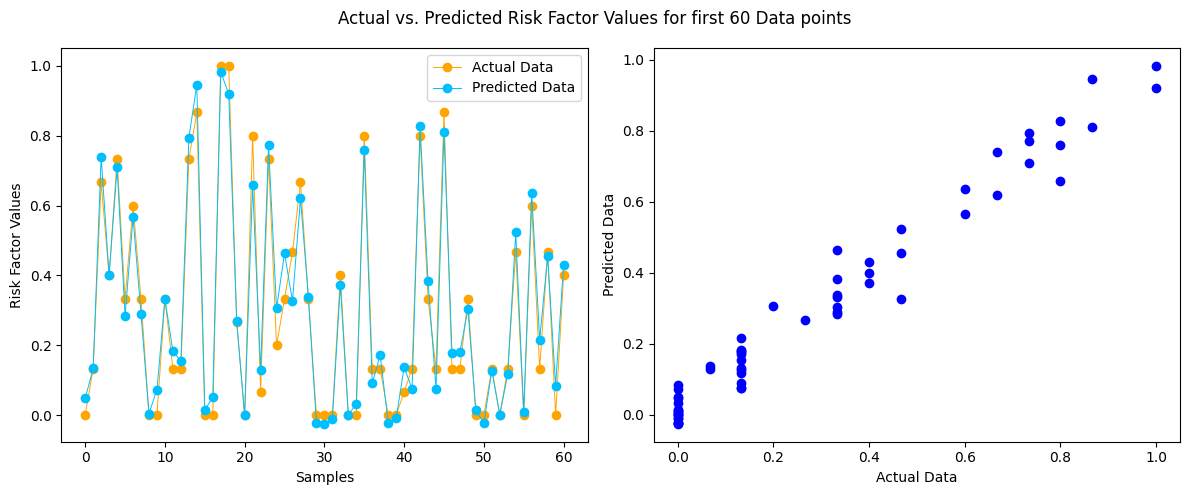

In [32]:
print("Support Vector Machine Regressor (SVM-SVR) with Best Parameters - RBF Kernel")
svr_rbf = SVR(kernel='rbf', gamma='auto', max_iter=25000, C=3, epsilon=0.01)
Regressor(svr_rbf, feature_train_regression, target_train)

## Cross Validation performance analysis

Cross Validation estimates how well a model will perform on unseen data or in a real-world setting and addressing the problem of overfitting.
- K-Fold Cross Validation: Dataset is divided into K equally sized folds/partitions. The model is trained and evaluated K times, each time using a different fold as the testing set and the remaining K-1 folds as the training set
- The function below uses K-Fold Cross validation with 5 folds and trains our model to give us better prediction.

In [33]:
def k_fold_cross_val_regression(regressor, feature, target_value, folds = 5):
    """
    Perform K-fold cross-validation to get the best model.
    
    Parameters:
    - regressor: The regressor used
    - feature: Feature matrix (numpy array)
    - target_value: Target values (numpy array)
    - folds: Number of folds for cross-validation / k
    
    Returns:
    - best_model: Trained SVR Regressor with the best average r2-score
    - best_r2_score: R2 Score of the trained model
    """
    
    cv_scores = []
    kfoldcv = KFold(n_splits = folds, shuffle = True, random_state = 42)
    best_model = None
    best_r2_score = 0.0

    # Loop through the folds
    for feature_index, target_index in kfoldcv.split(feature, target_value):
        # Split the data into train and test sets for this fold
        X_train, X_test = feature[feature_index], feature[target_index]
        y_train, y_test = target_value[feature_index], target_value[target_index]
        regressor.fit(X_train, y_train)
        y_pred = regressor.predict(X_test)

        # Calculate the accuracy for this fold
        r2_score_value = r2_score(y_test, y_pred)
        cv_scores.append(r2_score_value)

        # Update the best model if the current model has a higher f1_score
        if r2_score_value > best_r2_score:
            best_model = regressor
            best_r2_score = r2_score_value
            
    average_r2_score = np.mean(cv_scores)
    print("K-Fold Cross-Validation Results:")
    for i, r2_score_value in enumerate(cv_scores, start = 1):
        print(f"Fold {i}: R2_Score = {r2_score_value:.4f}")

    print(f"Average R2 Score: {average_r2_score:.4f}")

    return best_model, best_r2_score

svr_rbf = SVR(kernel='rbf', gamma='auto', max_iter=25000, C=3, epsilon=0.01)
svr_best_regressor_model, best_r2_score = k_fold_cross_val_regression(svr_rbf, 
                                                                      feature_train_regression, 
                                                                      target_train, 
                                                                      folds = 5)
print("Best R2 Score of the Model: ", best_r2_score)

K-Fold Cross-Validation Results:
Fold 1: R2_Score = 0.9732
Fold 2: R2_Score = 0.9744
Fold 3: R2_Score = 0.9731
Fold 4: R2_Score = 0.9720
Fold 5: R2_Score = 0.9755
Average R2 Score: 0.9737
Best R2 Score of the Model:  0.9754708569463467


## Prediction on the test data

In the below cells, we have performed a prediction on the test data. We have used SVM_SVR Classifier Model built above after cross validation __`svr_best_regressor_model`__ for this prediction. 
- We have to perform the same preprocessing operations on the test data that we have performed on the train data. For this purpose, we create a function to do the same and apply it on the test data.
- We then make a prediction on the preprocessed test data using the above model.

In [35]:
def data_preprossing_test_regression(feature_test, target_test):
    '''
    Perform previous data preprossing steps on the untouched test data we split at start.
    
    Parameters:
    - feature_test: The festures used for testing
    - target_test: The target values that needs to be predicted for testing
    
    Returns:
    - feature_test: Data Processed Test Feature Vector 
    - target_test: Data Processed Test Label Vector 
    '''
    feature_test = feature_test.drop(columns = same_data_columns, errors='ignore') #Removing Columns with same data in all columns
    feature_test = feature_test[top_features_regression].reset_index(drop=True) #Using columns wihc contributed the most
    feature_test = feature_scaling(feature_test) #Scaling the Features
    # feature_test = treat_outliers(feature_test)
    
    return feature_test, target_test

feature_test_regression, target_test = data_preprossing_test_regression(feature_test, target_test)

Output on the test data created at the start
Mean Squared Error:  0.003106843334378083
R2 Score:  0.9679355023222546


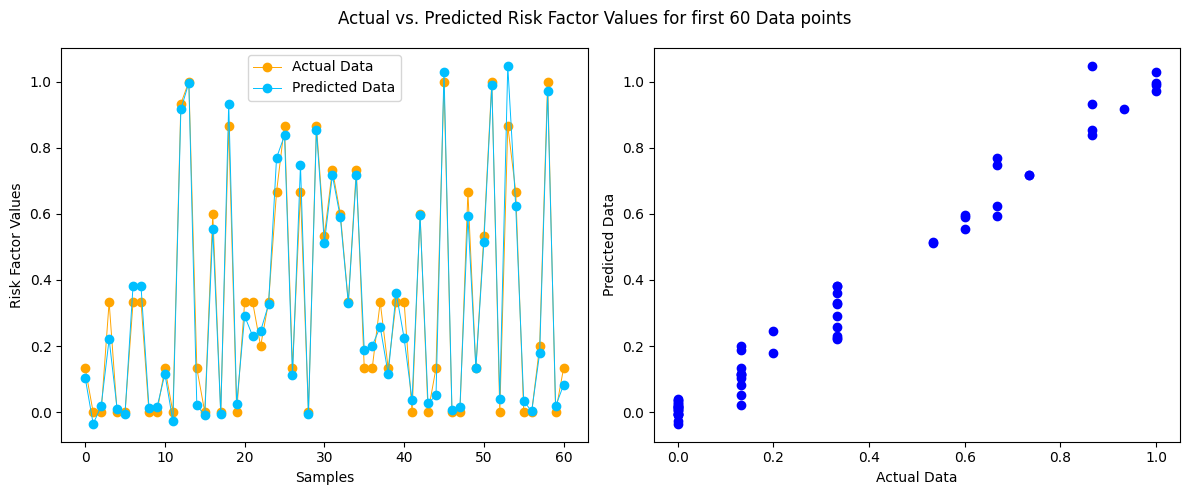

In [36]:
print("Output on the test data created at the start")

# Predict on the test set
target_pred = svr_best_regressor_model.predict(feature_test_regression)

print("Mean Squared Error: ", mean_squared_error(target_test, target_pred))
print("R2 Score: ", r2_score(target_test, target_pred))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting line graph of actual vs. predicted values for first 60 points
axes[0].plot(target_test[0:61], label='Actual Data', marker='o',linewidth = 0.7, linestyle='-', color='orange')
axes[0].plot(target_pred[0:61], label='Predicted Data', marker='o',linewidth = 0.7, linestyle='-', color='deepskyblue')
axes[0].set_xlabel('Samples')
axes[0].set_ylabel('Risk Factor Values')
axes[0].legend()

# Plotting the scatter plot of actual vs. predicted values for first 60 points
axes[1].scatter(target_test[0:61], target_pred[0:61], color='blue', marker='o')
axes[1].set_xlabel('Actual Data')
axes[1].set_ylabel('Predicted Data')

fig.suptitle('Actual vs. Predicted Risk Factor Values for first 60 Data points')
plt.tight_layout()
plt.show()

## __Conclusion from Task 2__
- We have foud that __`SVM-SVR` Model with `rbf` Kernal__ gives us the best prediction of the risk values. We have performed `GridSearchCV` to get the optimim hyperparameters and `K-fold Cross Validation` to train the model on all round data to avoid overfitting.
- Upon testing on the test data we split at the start of the project, we find that the model we created gives us a good performance score `R2 Score` of __0.968__ and a `Mean Square Error` of __0.0031__.

__=============================================================================================================__

# Task 3 - Developing a model to predict Risk Class

##### Below is a Python function that takes training data, performs classification using a machine learning model
- In this function:
    - __`clf`__ is the classification model we want to evaluate
    - __`feature`__ and __`label`__ are the Feature Vector and Target array we use to train and test our model on
    - __`x_train`__ and __`y_train`__ are our feature and target data for train the clf model
    - __`x_test`__ and __`y_test`__ are the testing features and target labels for evaluating the model
    - It generates performance metrics such `Accuracy`, `F1-score`, `precision`, `recall` and plots the `confusion matrix`.

In [37]:
class_order = ["Safe", "Low Risk", "Moderate Risk", "High Risk"]
def Classifier(clf, feature, label):
    x_train, x_test, y_train, y_test = train_test_split(feature, label, train_size = 0.8, random_state = 42)
    # Fit the model
    model = clf.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    # Print the scores
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))
    print("Precision Score: ", precision_score(y_test, y_pred, average='macro'))
    print("Recall Score: ", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score: ", f1_score(y_test, y_pred, average='macro'))

    y_test = decode_labels(y_test, class_order = class_order)
    y_pred = decode_labels(y_pred, class_order = class_order)
    
    # Plot the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred, labels = class_order)
    disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = class_order)
    fig, cm_ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
    cm_ax.set_xlabel('Predicted labels')
    cm_ax.set_ylabel('True labels')
    cm_ax.set_xticklabels([''] + class_order)
    cm_ax.set_yticklabels([''] + class_order)
    disp.plot(ax = cm_ax, cmap = plt.cm.YlGn)
    plt.title('Confusion Matrix')
    plt.show()

## Performance of four different Machine Learning models

In this analysis, we explore the performance of four different machine learning models: Support Vector Machine (SVM) with a radial basis function (RBF) kernel, SVM with a polynomial kernel, k-Nearest Neighbors (KNN), and Multi-Layer Perceptron (MLP). Each of these models has its unique characteristics and is suited for different types of data and tasks:

1. **SVC with RBF Kernel**: Support Vector Machine with a radial basis function kernel is a classifier that can handle both linear and non-linear data separation. It works by finding the best decision boundary that maximizes the margin between classes in a high-dimensional space.
2. **SVC with Polynomial Kernel**: Support Vector Machine with a polynomial kernel is another variation of SVM that captures complex feature data. It uses polynomial functions to map the data into a higher-dimensional space.
3. **K-Nearest Neighbors (KNN)**: K-Nearest Neighbors an effective classification algorithm. It classifies data points based on the majority class among their k-nearest neighbors in the feature space.
4. **Multi-Layer Perceptron (MLP)**: Multi-Layer Perceptron is a type of artificial neural network (ANN) with multiple layers of interconnected neurons. It can model complex patterns and relationships in the data.

- To evaluate the performance of these models, we use the above created Classifier function that computes key metrics of Accuracy, F1 Score, Precision and Recall.
- Also, we generate confusion matrices for each model in that function. A confusion matrix will provide a breakdown model's predictions with actual class labels.

Support Vector Machine Classifier (SVM-SVC) with RBF Kernel
Accuracy Score:  0.9178208679593721
Precision Score:  0.9184877847900295
Recall Score:  0.9185464840908139
F1 Score:  0.9185102991162102


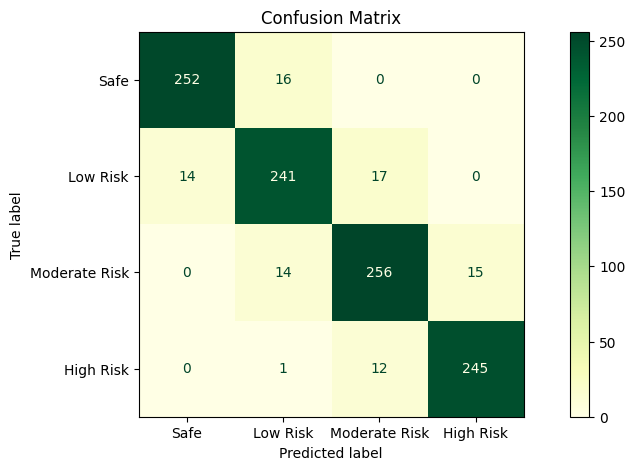

Support Vector Machine Classifier (SVM-SVC) with Poly Kernel
Accuracy Score:  0.39242843951985223
Precision Score:  0.382555117233153
Recall Score:  0.4027879840394113
F1 Score:  0.3370822703368219


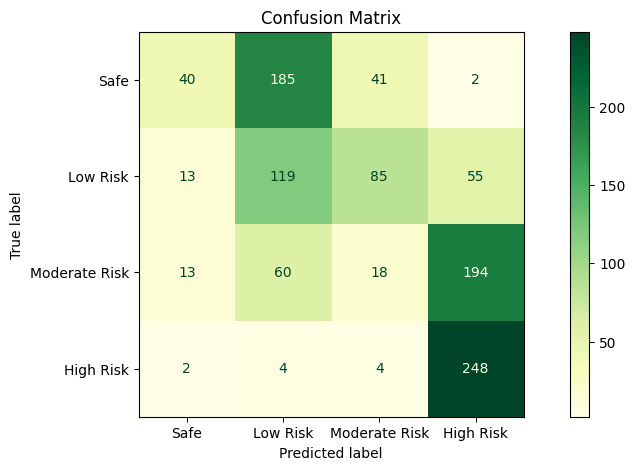

K-Nearest Neighbours Classifier (KNN)
Accuracy Score:  0.8790397045244691
Precision Score:  0.8790925675145439
Recall Score:  0.8807862641576479
F1 Score:  0.8788376936013258


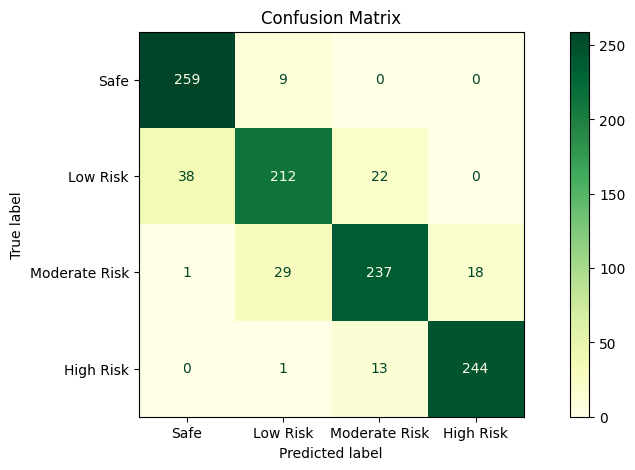

Multi-layer Perceptron Classifier (MLP)
Accuracy Score:  0.9409048938134811
Precision Score:  0.9417908013856249
Recall Score:  0.941750589875878
F1 Score:  0.9415607396376562


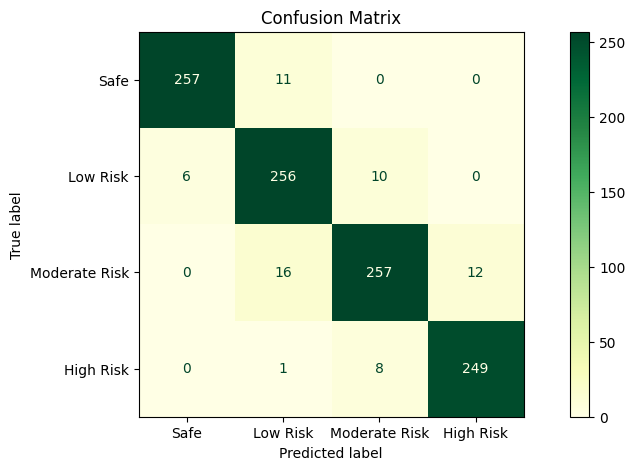

In [38]:
### SVC with rbf kernel
print("Support Vector Machine Classifier (SVM-SVC) with RBF Kernel")
svc_rbf = SVC(kernel='rbf', gamma='auto', random_state=42, C=1.0, coef0=0.0, tol=1e-3)
Classifier(svc_rbf, feature_train_classification, encoded_labels_train)

### SVC with poly kernel
print("Support Vector Machine Classifier (SVM-SVC) with Poly Kernel")
svc_poly = SVC(kernel='poly', gamma='auto', random_state=42, C=1.0, coef0=0.0, tol=1e-3, max_iter=300)
Classifier(svc_poly, feature_train_classification, encoded_labels_train)

### knn classifier
print("K-Nearest Neighbours Classifier (KNN)")
knn_clf = KNeighborsClassifier(n_neighbors = 6)
Classifier(knn_clf, feature_train_classification, encoded_labels_train)

### mlp classifier
print("Multi-layer Perceptron Classifier (MLP)")
mlp_clf = MLPClassifier(hidden_layer_sizes=(100), activation='relu', solver='adam', alpha=0.0001, max_iter=200, shuffle=True, random_state=42)
Classifier(mlp_clf, feature_train_classification, encoded_labels_train)

- In our analysis, we evaluated multiple machine learning model performances using various performance metrics. (__Especially the Recall Score__ - the importance of which is highlighted below). After careful examination of these metrics, it is evident that the Multi-layer Perceptron Classifier (MLP) model stands out as the top-performing model for the data with a good performance metrices.
- The MLP model has demonstrated the highest level effectiveness, achieving the best balance between precision (minimizing false positives) and recall (capturing true positives).
- This indicates that the MLP model is well-suited for our specific classification task the most promising choice among the models we evaluated and should be considered as the preferred option for our data classification needs.

## Hyperparameter Tuning on the MLP Classifier
We take further steps to optimize the MLP model's performance using hyperparameter tuning. To achieve this, we use GridSearchCV. This process involves systematically exploring various combinations of hyperparameters to find the optimal configuration for our MLP model.

The hyperparameters we cross-validate in this process include:
- **`alpha`**: A regularization parameter that controls complexity of the model.
- **`max_iter`**: The maximum iterations for model training.
- **`solver`**: The optimization algorithm used for training the MLP. (`lbfgs`, `gd`, `adam`)
- **`activation`**: The activation function used in the neural network's layers.

Through GridSearchCV, we evaluate these hyperparameters and their combinations to identify the set that yields the best performance for our MLP model. This helps us fine-tune the model to achieve its optimal predictive capabilities.

Ultimately, the output of this process is the determination of the "Best Hyperparameters for MLP Classifier" which represent the most suitable parameter configuration for our MLP model.

#### --------------- Do Not Run, takes a lot of time --------------------

In [75]:
### MLP Grid Search
mlp_param_grid = {'hidden_layer_sizes': [(100, 100, 100), (100, 100)],
                  'max_iter': [100, 200, 400], 
                  'solver': ['lbfgs', 'adam'], 
                  'activation': ['tanh', 'relu']}

mlp_classifier = MLPClassifier()
mlp_grid_search = GridSearchCV(mlp_classifier, mlp_param_grid)
mlp_grid_search.fit(feature_train_classification, encoded_labels_train)
print("Best Hyperparameters for MLP Classifier:", mlp_grid_search.best_params_)

Best Hyperparameters for MLP Classifier: {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'max_iter': 200, 'solver': 'adam'}


Multi-layer Perceptron Classifier (MLP) with best features
Accuracy Score:  0.9602954755309326
Precision Score:  0.9606588125956094
Recall Score:  0.9609233413446125
F1 Score:  0.9607084504844566


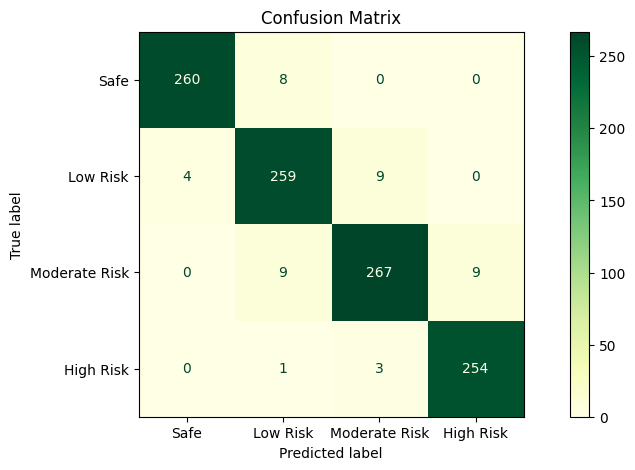

In [39]:
### MLP with Best Features
print("Multi-layer Perceptron Classifier (MLP) with best features")
mlp_best_classifier = MLPClassifier(solver = 'lbfgs',
                                    activation = 'relu',
                                    alpha = 10,
                                    hidden_layer_sizes = (100, 100, 100),
                                    max_iter = 200 , 
                                    shuffle = True, 
                                    random_state=42)
Classifier(mlp_best_classifier, feature_train_classification, encoded_labels_train)

## Hyperparameter Tuning on the MLP Classifier for Hidden Layers
We take further steps to optimize the MLP model's performance using hyperparameter tuning of the hidden layers.

The hyperparameters we cross-validate in this process include:
- **hidden_layer_sizes**: The number of neurons in the hidden layers of the neural network.
- **alpha**: A regularization parameter that controls complexity of the model.

We evaluate these hyperparameters using a given set of bounds to identify the values which yield the best performance for our MLP model. This helps us fine-tune the model to achieve its optimal predictive capabilities.

Ultimately, the output of this process is the determination of the "Best Hideen Layer values for MLP Classifier" for our MLP model.

- Since our aim is to predict risk classes, the high risk predictions are most important for us and we need to make sure to not make any misclassifications by predicting high-risk or moderate risk classes as low risk. If this happens, it can prove to be catostrophic and a costly endeavour.
### Thus, we should consider a model with a high __Recall__ Metric value.

#### --------------- Do Not Run, takes a lot of time --------------------

Best Hidden Layer Parameters: {'alpha': 10.0, 'hidden_layer_sizes': (100, 100, 50)}
Best Recall Score: 0.9599066739716301


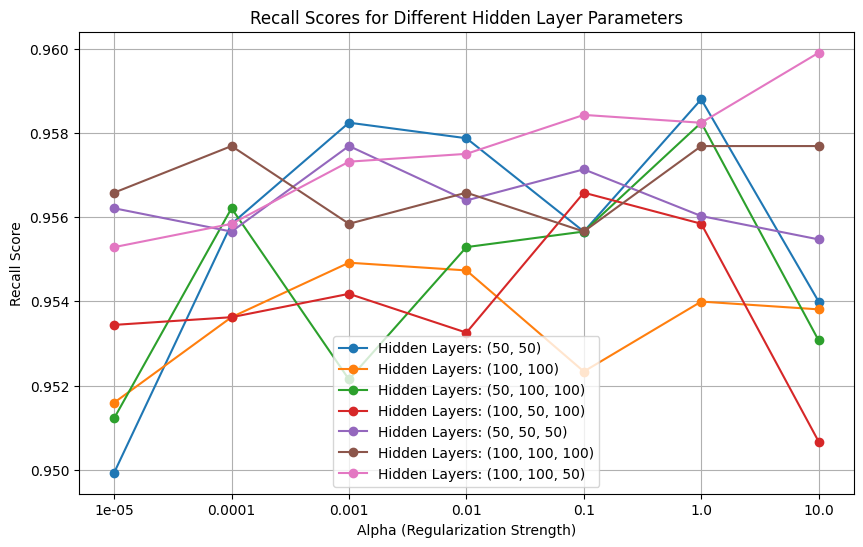

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid for hidden layer sizes and alpha
param_grid = {
    'hidden_layer_sizes': [(50,50), (100,100), (50, 100, 100), (100, 50, 100), (50, 50, 50), (100,100,100), (100,100, 50)],
    'alpha': np.logspace(-5, 1, 7),
}

# Create a custom scoring function for recall
recall_scorer = make_scorer(recall_score, average='weighted')

# Perform grid search CV
grid_search = GridSearchCV(mlp_best_classifier, param_grid, cv=5, scoring=recall_scorer)
grid_search.fit(feature_train_classification, encoded_labels_train)

# Get the best parameters and best recall score
best_params = grid_search.best_params_
best_recall = grid_search.best_score_

# Print the best parameters and recall score
print("Best Hidden Layer Parameters:", best_params)
print("Best Recall Score:", best_recall)

# Plot the recall scores for different parameter combinations
recall_scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['hidden_layer_sizes']), -1)
alphas = [str(params) for params in param_grid['alpha']]

plt.figure(figsize=(10, 6))
for i, values in enumerate(param_grid['hidden_layer_sizes']):
    plt.plot(alphas, recall_scores[i], marker='o', label=f'Hidden Layers: {values}')

plt.xlabel("Alpha (Regularization Strength)")
plt.ylabel("Recall Score")
plt.title("Recall Scores for Different Hidden Layer Parameters")
plt.legend()
plt.grid()
plt.show()

In [58]:
recall_scores = []
hidden_layer_1, hidden_layer_2, hidden_layer_3 = [], [], []
x_train, x_test, y_train, y_test = train_test_split(feature_train_classification, encoded_labels_train, train_size = 0.8, random_state = 42)
for k in range(40, 101):
    mlp_best_classifier = MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 10,
                                        hidden_layer_sizes = (100, 100, k), max_iter = 200, shuffle = True,  random_state=42)

    # Fit the model
    model = mlp_best_classifier.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    hidden_layer_1.append(100)
    hidden_layer_2.append(100)
    hidden_layer_3.append(k)
            
    
# Print the scores
print("Best Recall Score: ", max(recall_scores))
print("Best Hidden Layer Value: ", hidden_layer_1[recall_scores.index(max(recall_scores))],  hidden_layer_2[recall_scores.index(max(recall_scores))], hidden_layer_3[recall_scores.index(max(recall_scores))])

Best Recall Score:  0.968106402163708
Best Hidden Layer Value:  100 100 74


In [60]:
recall_scores = []
hidden_layer_1, hidden_layer_2, hidden_layer_3 = [], [], []
x_train, x_test, y_train, y_test = train_test_split(feature_train_classification, encoded_labels_train, train_size = 0.8, random_state = 42)
for k in range(40, 101):
    mlp_best_classifier = MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 10,
                                        hidden_layer_sizes = (100, k, 74), max_iter = 200, shuffle = True,  random_state=42)

    # Fit the model
    model = mlp_best_classifier.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    hidden_layer_1.append(100)
    hidden_layer_2.append(k)
    hidden_layer_3.append(74)
            
    
# Print the scores
print("Best Recall Score: ", max(recall_scores))
print("Best Hidden Layer Value: ", hidden_layer_1[recall_scores.index(max(recall_scores))],  hidden_layer_2[recall_scores.index(max(recall_scores))], hidden_layer_3[recall_scores.index(max(recall_scores))])

Best Recall Score:  0.9700740047064698
Best Hidden Layer Value:  100 87 74


In [61]:
recall_scores = []
hidden_layer_1, hidden_layer_2, hidden_layer_3 = [], [], []
x_train, x_test, y_train, y_test = train_test_split(feature_train_classification, encoded_labels_train, train_size = 0.8, random_state = 42)
for k in range(40, 101):
    mlp_best_classifier = MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 10,
                                        hidden_layer_sizes = (k, 87, 74), max_iter = 200, shuffle = True,  random_state=42)

    # Fit the model
    model = mlp_best_classifier.fit(x_train, y_train)
    # Predict on the test set
    y_pred = model.predict(x_test)
    recall_scores.append(recall_score(y_test, y_pred, average='macro'))
    hidden_layer_1.append(k)
    hidden_layer_2.append(87)
    hidden_layer_3.append(74)
            
    
# Print the scores
print("Best Recall Score: ", max(recall_scores))
print("Best Hidden Layer Value: ", hidden_layer_1[recall_scores.index(max(recall_scores))],  hidden_layer_2[recall_scores.index(max(recall_scores))], hidden_layer_3[recall_scores.index(max(recall_scores))])

Best Recall Score:  0.9701159293710725
Best Hidden Layer Value:  47 87 74


Multi-layer Perceptron Classifier (MLP) with best features
Accuracy Score:  0.9695290858725761
Precision Score:  0.9698618866681104
Recall Score:  0.9701159293710725
F1 Score:  0.9699011320958209


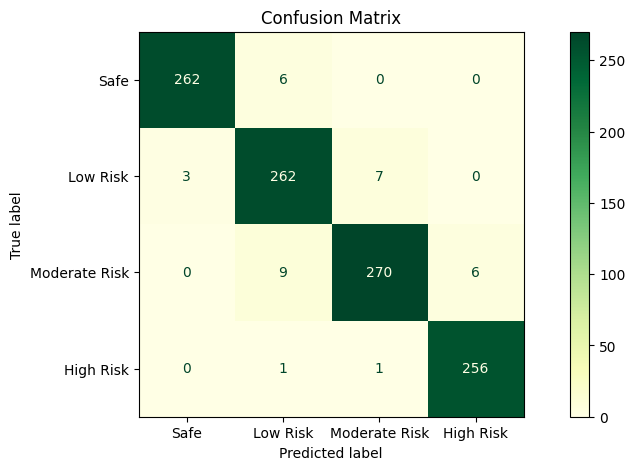

In [42]:
### MLP with Best Hidden Layer Values
print("Multi-layer Perceptron Classifier (MLP) with best features")
mlp_best_classifier = MLPClassifier(solver = 'lbfgs',
                                    activation = 'relu',
                                    alpha = 10,
                                    hidden_layer_sizes = (47, 87, 74),
                                    max_iter = 200 , 
                                    shuffle = True, 
                                    random_state=42)
Classifier(mlp_best_classifier, feature_train_classification, encoded_labels_train)

## Cross Validation performance analysis

Cross Validation estimates how well a model will perform on unseen data or in a real-world setting and addressing the problem of overfitting.
- Stratified K-Fold Cross Validation: Dataset is divided into K equally sized folds/partitions. The model is trained and evaluated K times, each time using a different fold as the testing set and the remaining K-1 folds as the training set
- The function below uses K-Fold Cross validation with 5 folds and trains our model to give us better better prediction.

In [43]:
def k_fold_cross_val_classifier(classifier, feature, target_label, folds = 5):
    """
    Perform K-fold cross-validation to get the best model.
    
    Parameters:
    - clasifier: The classifier used
    - feature: Feature matrix (numpy array)
    - target_label: Target Labels (numpy array)
    - folds: Number of folds for cross-validation / k
    
    Returns:
    - best_model: Trained MLPClassifier with the best average f1-score
    - best_f1_score: F1 Score of the trained F1 Score
    """
    
    cv_scores = []
    kfoldcv = StratifiedKFold(n_splits = folds, shuffle = True, random_state = 42)
    best_model = None
    best_recall_score = 0.0

    # Loop through the folds
    for feature_index, target_index in kfoldcv.split(feature, target_label):
        # Split the data into train and test sets for this fold
        X_train, X_test = feature[feature_index], feature[target_index]
        y_train, y_test = target_label[feature_index], target_label[target_index]
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # Calculate the accuracy for this fold
        recall_score_value = recall_score(y_test, y_pred, average='macro')
        cv_scores.append(recall_score_value)

        # Update the best model if the current model has a higher f1_score
        if recall_score_value > best_recall_score:
            best_model = classifier
            best_recall_score = recall_score_value
            
    average_recall_score = np.mean(cv_scores)
    print("K-Fold Cross-Validation Results:")
    for i, recall_score_value in enumerate(cv_scores, start = 1):
        print(f"Fold {i}: Recall Score = {recall_score_value:.4f}")

    print(f"Average recall Score: {average_recall_score:.4f}")

    return best_model, best_recall_score

mlp_classifier = MLPClassifier(solver = 'lbfgs', activation = 'relu', alpha = 10, hidden_layer_sizes = (47, 87, 74), 
                               max_iter = 200, shuffle = True, random_state=42)
mlp_best_classifier_model, best_recall_score = k_fold_cross_val_classifier(mlp_best_classifier, 
                                                                       feature_train_classification, 
                                                                       encoded_labels_train, 
                                                                       folds = 5)
print("Best Recall Score of the Model: ", best_recall_score)

K-Fold Cross-Validation Results:
Fold 1: Recall Score = 0.9474
Fold 2: Recall Score = 0.9603
Fold 3: Recall Score = 0.9630
Fold 4: Recall Score = 0.9602
Fold 5: Recall Score = 0.9446
Average recall Score: 0.9551
Best Recall Score of the Model:  0.9629868798687987


## Prediction on the test data

In the below cells, we have performed a prediction on the test data. We have used MLP Classifier Model built above for this prediction. 
- We have to perform the same preprocessing operations on the test data that we have performed on the train data. For this purpose, we create a function to do the same and apply it on the test data.
- We then make a prediction on the preprocessed test data using the above model.

In [44]:
def data_preprossing_test_classification(feature_test, label_test, class_order):
    '''
    Perform previous data preprossing steps on the untouched test data we split at start.
    
    Parameters:
    - feature_test: The festures used for testing
    - label_test: The labels that needs to be predicted for testing
    - class_order: Order of Class Importance
    
    Returns:
    - feature_test: Data Processed Test Feature Vector 
    - label_test: Data Processed Test Label Vector 
    '''
    feature_test = feature_test.drop(columns = same_data_columns, errors='ignore') #Removing Columns with same data in all columns
    feature_test = feature_test[top_features_classification].reset_index(drop=True) #Using columns wihc contributed the most
    feature_test = feature_scaling(feature_test) #Scaling the Features
    # feature_test = treat_outliers(feature_test)
    
    label_test = encode_labels(label_test, class_order) #Encoding the Target Labels
    return feature_test, label_test

feature_test_classification, label_test = data_preprossing_test_classification(feature_test, label_test, class_order =  ["Safe", "Low Risk", "Moderate Risk", "High Risk"])

### Testing the Model we built above using the test data and predicting the performance metrics

- We have prepared the model __`mlp_best_classifier_model`__ in after performing the cross validation and choosing the optimum hyper-parametrs.
- We have also modified the test data and pre-processed it to suit the model inputs and be consistent with it.
- Now, it is time to run the test data we seperated at the start of the project and check the performance of our model.

Accuracy Score:  0.9283551967709385
Precision Score:  0.9186856845723024
Recall Score:  0.9298181357914441
F1 Score:  0.9236600822859748


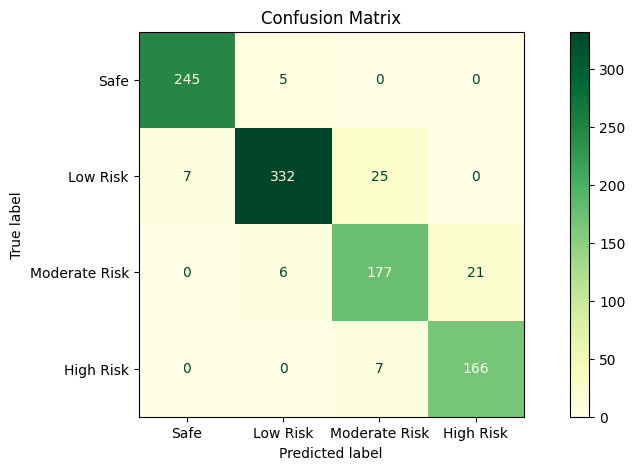

In [45]:
label_pred = mlp_best_classifier_model.predict(feature_test_classification)

# Print the scores
print("Accuracy Score: ", accuracy_score(label_test, label_pred))
print("Precision Score: ", precision_score(label_test, label_pred, average='macro'))
print("Recall Score: ", recall_score(label_test, label_pred, average='macro'))
print("F1 Score: ", f1_score(label_test, label_pred, average='macro'))

label_test = decode_labels(label_test, class_order = class_order)
label_pred = decode_labels(label_pred, class_order = class_order)

# Plot the confusion matrix
confusion_mat = confusion_matrix(label_test, label_pred, labels = class_order)
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = class_order)
fig, cm_ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
cm_ax.set_xlabel('Predicted labels')
cm_ax.set_ylabel('True labels')
cm_ax.set_xticklabels([''] + class_order)
cm_ax.set_yticklabels([''] + class_order)
disp.plot(ax = cm_ax, cmap = plt.cm.YlGn)
plt.title('Confusion Matrix')
plt.show()

## __Conclusion from Task 3__
- We have foud that __`MLPClassifier`__ with lbfgs solver and relu activation function gives us the best prediction of the risk classes. We have performed GridSearchCV to get the optimim hyperparameters including the hideen layers and K-fold cross validation to train the model on all round data to avoid overfitting.
- Upon testing on the test data we split at the start of the project, we find that the model we created gives us a good performance score (Recall Score) of __0.9298__.
- In our case, the problem is predicting the risk of failure of the power system. This problem presents with the fact that we should have a bias towards stopping the movement of wrong classification of high-risk entities towards low-risk or safe as this may prove catastrophic for us. For once, we can tolarate a wrong classification towards a higher class but the vice versa might prove costly. Hence, We consider __`Recall`__ as the most important metric for our problem statement and we have designed the prediction solution keeping a high recall score in mind.

#### __Why misclassification going towards in the `Moderate-Risk/High-Risk` direction is better than that going towards `Safe/Low-Risk`__
1. We can observe from confusion matrix that our model gives a bit more priority to the High-Risk labels. There are no labels that are actually high-risk values and that are misclassified as low-risk or safe.
2. There are only 7 high risk ones classified as moderate risk. There are some of the labesl which are moderate risk misclassified as high-risk and there are some low-risk labels misclassified as moderate-risk (25).
3. This is the only major misclassification we can observe in the results. Although, presence of this is not desirable, it is certainly not catastrophic. In fact, it is a good thing that the model misclassified moderate-risk scenarios as high-risk instead of low-risk or safe.
4. In these cases, we can investigate further and either choose to ignore them or mitigate them instead of completely ignoring them and suffering the consequences later due to a `Safe` misclassification. 

__=============================================================================================================__

# Detailed Machine Learning Workflow Diagram
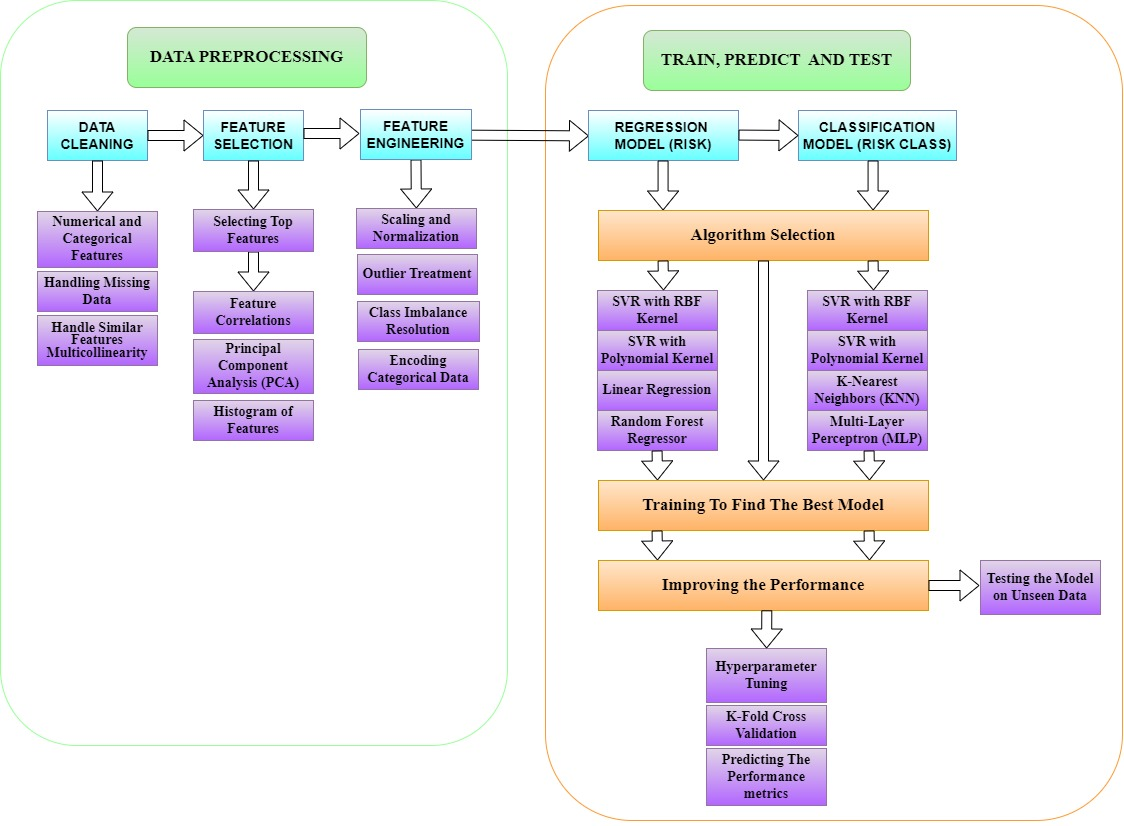